# MSDS 422 Assignment 1 - Exploring and Visualizing Data:

This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.io/styleguide/pyguide.html) for ideas about formatting Python code:

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

#### Background Materials
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide (Links to an external site.)

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  See https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py (Links to an external site.)

 (Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)
 
 #### Table of Contents
 - Data preparation (10 points)
 - Data exploration (10 points) & Data Visualization (10 points)
 - Data scaling and comparisons (10 points)
 - Insights from analysis (10 points)

## Data preparation

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from IPython.display import display
from IPython.display import HTML
import datetime as dt

today = dt.datetime.today().strftime("%d %b %Y")

Download the data from opendata.ecdc.europa.eu

In [2]:
# load the data
rawdata = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  26562 non-null  object 
 1   day                      26562 non-null  int64  
 2   month                    26562 non-null  int64  
 3   year                     26562 non-null  int64  
 4   cases                    26562 non-null  int64  
 5   deaths                   26562 non-null  int64  
 6   countriesAndTerritories  26562 non-null  object 
 7   geoId                    26455 non-null  object 
 8   countryterritoryCode     26498 non-null  object 
 9   popData2019              26498 non-null  float64
 10  continentExp             26562 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.2+ MB


In [4]:
rawdata.describe(include='all')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
count,26562,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,26562,26455,26498,2.649800e+04,26562
unique,182,NaN,NaN,NaN,NaN,NaN,210,209,209,NaN,6
top,27/05/2020,NaN,NaN,NaN,NaN,NaN,Iceland,US,IRN,NaN,Europe
freq,209,NaN,NaN,NaN,NaN,NaN,182,182,182,NaN,8008
mean,NaN,16.207929,4.194790,2019.997478,380.722611,18.882690,NaN,NaN,NaN,4.689196e+07,NaN
std,NaN,8.745421,1.555569,0.050161,2172.430663,121.386696,NaN,NaN,NaN,1.675462e+08,NaN
min,NaN,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,NaN,NaN,NaN,8.150000e+02,NaN
25%,NaN,9.000000,3.000000,2020.000000,0.000000,0.000000,NaN,NaN,NaN,1.919968e+06,NaN
50%,NaN,17.000000,4.000000,2020.000000,4.000000,0.000000,NaN,NaN,NaN,8.776119e+06,NaN
75%,NaN,24.000000,5.000000,2020.000000,68.000000,1.000000,NaN,NaN,NaN,3.194979e+07,NaN


#### Conclusion for Data Preparation
The dataRep data type is an object, not DateTime so that will make comparing by date problematic. I will will correct this by setting the attribute to DateTime and correct it using the day, month, and year attributes. There are also a small amount of nulls in geoId (0.004%) and countryterritoryCode (0.002%) that I will remove. Looking at the month and years it appears there is data that is loaded in the future that will need to be removed since I am only concerned at analyzing data that is from the earliest record to today. Lastly, there are cases and deaths that are negative which may be due to some countries correcting reported cases and deaths that I will set to zero for this analysis.

Prepare and clean the data
- drop NaN and NA
- convert the columns: dateRep to datetime64, popData2019 to int64
- fix dateRep not as a good date using the month, day, and year columns to construct a datetime
- limit the data set to only recent data, will include all data less than and including today
- cases and deaths should be greater than or equal to 0

In [5]:
# clean the data
#   -- eliminate NA's
data = rawdata.dropna()

#   -- redo data types of some columns
data = data.astype({ 'dateRep': 'datetime64', 'popData2019': "int64" })

#   -- fix dateRep not as a good date using the month, day, and year columns to construct a datetime
def fixdate(m,d,y):
    return pd.to_datetime(str(m) + "/" + str(d) + "/" + str(y))

data['dateRep'] = data.apply(lambda x: fixdate(x.month, x.day, x.year), axis=1)

#   -- limit the data set to only recent data, will include all data less than and including today
data = data[data['dateRep'] < pd.to_datetime('today')]

#  -- cases and deaths should be greater than or equal to 0
data = data[(data['cases'] >= 0) & (data['deaths'] >= 0)]

Inspect the data after preparation and cleanup

In [6]:
data.shape

(26376, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26376 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26376 non-null  datetime64[ns]
 1   day                      26376 non-null  int64         
 2   month                    26376 non-null  int64         
 3   year                     26376 non-null  int64         
 4   cases                    26376 non-null  int64         
 5   deaths                   26376 non-null  int64         
 6   countriesAndTerritories  26376 non-null  object        
 7   geoId                    26376 non-null  object        
 8   countryterritoryCode     26376 non-null  object        
 9   popData2019              26376 non-null  int64         
 10  continentExp             26376 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 2.4+ MB


In [8]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757,Asia


In [9]:
data[data['countriesAndTerritories'] == 'United_States_of_America'].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
25436,2020-06-29,29,6,2020,38673,265,United_States_of_America,US,USA,329064917,America
25437,2020-06-28,28,6,2020,42486,500,United_States_of_America,US,USA,329064917,America
25438,2020-06-27,27,6,2020,45527,623,United_States_of_America,US,USA,329064917,America
25439,2020-06-26,26,6,2020,40949,2437,United_States_of_America,US,USA,329064917,America
25440,2020-06-25,25,6,2020,34339,751,United_States_of_America,US,USA,329064917,America


## Data exploration (10 points) & Data Visualization (10 points)

In [10]:
data.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp'],
      dtype='object')

### Exploration - Step 1: Sum of Cases, Sum of Deaths, Fatality Rate, Reported Cases per 100,000 population,  Reported Deaths per 100,000 population -- By Continent + Country/Territory

The first exploration will look at each continent and the countries in those continents and calculate the sum of cases and the sum of deaths which will be used to create the features:
- Fatality Rate (sum of cases) / (sum of deaths)
- Reported Cases per 100,000 population (sum of cases) / (population * 100,000)
- Reported Deaths per 100,000 population (sum of deaths) / (population * 100,000)

In [11]:
# set rate / rates per 100,000
population = 100000

def get_facts(attr = 'countriesAndTerritories', population=100000, f_rate = 100):
    # get the cumulative cases and deaths by countries and territories
    cumulative_cases_deaths = data.groupby(['continentExp',attr]).\
            agg({'cases': 'sum', 'deaths': 'sum', 'popData2019': 'max'}).reset_index()#.groupby(level=0).cumsum().reset_index()

    # rename columns
    cumulative_cases_deaths.rename(columns={'cases': 'Sum of Cases', 'deaths': 'Sum of Deaths', \
                                    'popData2019': 'Population'}, inplace=True)


    # function to compute the features of:
    #   fatality_rate
    #   fatality_rate_per_100000
    #   case_rate_per_100000
    def get_features(x):
        d = {}

        d['Fatality Rate'] = x['Sum of Deaths'] / x['Sum of Cases'] * f_rate
        d['Reported Cases per 100 000 population'] = x['Sum of Cases'] / x['Population'] * population
        d['Reported Deaths per 100 000 population'] = x['Sum of Deaths'] / x['Population'] * population    

        return pd.Series(d, index=['Fatality Rate', 'Reported Cases per 100 000 population', \
                                   'Reported Deaths per 100 000 population'])

    # join the data cumulative cases and deaths with the computed features
    cumulative_cases_deaths_add_features = cumulative_cases_deaths.\
        join(cumulative_cases_deaths.apply(get_features, axis=1))
    
    return cumulative_cases_deaths_add_features

cumulative_cases_deaths_add_features = get_facts()

In [12]:
# limit columns to display in table
col_display_list = ['countriesAndTerritories', 'Sum of Cases', 'Sum of Deaths', 'Population',\
                   'Fatality Rate', 'Reported Cases per 100 000 population', \
                    'Reported Deaths per 100 000 population']

# create a summary table per continent
for c in cumulative_cases_deaths_add_features.continentExp.unique():
    # copy dataframe into a new one for display
    exp1 = cumulative_cases_deaths_add_features
    # limit the continent to the filter from loop 
    exp1 = exp1[exp1.continentExp == c]
    # limit the columns to the list contained in col_display_list
    exp1 = exp1[col_display_list]
    exp1.sort_values(by='Sum of Cases', ascending=False, inplace=True)
    # get the grand totals for: Sum of Cases, Sum of Deaths, and Population
    exp1_grand_total = pd.DataFrame(exp1.sum(axis=0),columns=['Grand Total'])
    exp1_grand_total.iloc[[0,4,5,6]] = ''
    exp1_display = pd.concat([exp1,exp1_grand_total.T])
    
    #display
    #. Header
    display(HTML("<b>" + c + "</b>"))
    #. Summary - cases
    summary_cases = 'As of ' + today + ', <b>' + "{:,}".format(exp1['Sum of Cases'].sum()) + ' cases</b> have been reported in ' + \
        c + ': ' + \
        ', '.join([str(r['countriesAndTerritories']) + ' (' + str(r['Sum of Cases']) + ')' for i, r in exp1.iterrows()]) + \
        '.'
     #. Summary - deaths
    summary_deaths = 'As of ' + today + ', <b>' + "{:,}".format(exp1['Sum of Deaths'].sum()) + ' deaths</b> have been reported in ' + \
        c + ': ' + \
        ', '.join([str(r['countriesAndTerritories']) + ' (' + str(r['Sum of Deaths']) + ')' for i, r in exp1.iterrows()]) + \
        '.'
    #. Show
    display(HTML(summary_cases))
    display(HTML(summary_deaths))
    display(exp1_display)

,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
44,South_Africa,138134,2456,58558267,1.77798,235.892,4.19411
15,Egypt,65188,2789,100388076,4.27839,64.936,2.77822
37,Nigeria,24567,565,200963603,2.29983,12.2246,0.281145
22,Ghana,17351,112,30417858,0.645496,57.0421,0.368205
0,Algeria,13273,897,43053054,6.75808,30.8294,2.08348
6,Cameroon,12592,313,25876387,2.48571,48.6621,1.2096
34,Morocco,12052,221,36471766,1.83372,33.0447,0.605948
46,Sudan,9258,572,42813237,6.17844,21.6242,1.33604
12,Cote_dIvoire,8944,66,25716554,0.737925,34.7792,0.256644
13,Democratic_Republic_of_the_Congo,6826,157,86790568,2.30003,7.86491,0.180895


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
100,United_States_of_America,2548996,125804,329064917,4.93543,774.618,38.2308
64,Brazil,1344143,57622,211049519,4.2869,636.885,27.3026
90,Peru,279419,9317,32510462,3.33442,859.474,28.6585
68,Chile,271982,5509,18952035,2.0255,1435.11,29.0681
85,Mexico,216852,26648,127575529,12.2886,169.979,20.888
66,Canada,103239,8522,37411038,8.25463,275.959,22.7794
69,Colombia,91769,3106,50339443,3.38459,182.3,6.17011
75,Ecuador,59246,4312,17373657,7.27813,341.011,24.8192
56,Argentina,57731,1217,44780675,2.10805,128.919,2.71769
88,Panama,31686,604,4246440,1.9062,746.178,14.2237


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
110,India,548318,16475,1366417756,3.00464,40.1281,1.20571
112,Iran,222669,10508,82913893,4.71911,268.555,12.6734
128,Pakistan,206512,4167,216565317,2.0178,95.3578,1.92413
141,Turkey,197239,5097,82003882,2.58417,240.524,6.21556
132,Saudi_Arabia,182493,1551,34268529,0.849896,532.538,4.52602
105,Bangladesh,137787,1738,163046173,1.26137,84.508,1.06596
131,Qatar,94413,110,2832071,0.116509,3333.71,3.88408
109,China,84757,4641,1433783692,5.47565,5.91142,0.323689
111,Indonesia,54010,2754,270625567,5.09906,19.9575,1.01764
142,United_Arab_Emirates,47797,313,9770526,0.654853,489.196,3.20351


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
190,Russia,634437,9073,145872260,1.43009,434.926,6.21983
199,United_Kingdom,311676,43187,66647112,13.8564,467.651,64.7995
195,Spain,249855,29851,46937060,11.9473,532.319,63.5979
173,Italy,239881,34722,60359546,14.4747,397.42,57.5253
164,Germany,193761,8961,83019213,4.62477,233.393,10.7939
162,France,163702,29671,67012883,18.125,244.284,44.2766
196,Sweden,65137,5280,10230185,8.10599,636.714,51.612
151,Belarus,61475,383,9452409,0.623017,650.363,4.05188
152,Belgium,61361,9732,11455519,15.8602,535.646,84.9547
184,Netherlands,50147,6105,17282163,12.1742,290.166,35.3254


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
200,Australia,7686,104,25203200,1.35311,30.4961,0.412646
205,New_Zealand,1178,22,4783062,1.86757,24.6286,0.459956
203,Guam,253,5,167295,1.97628,151.23,2.98873
202,French_Polynesia,62,0,279285,0,22.1995,0
206,Northern_Mariana_Islands,30,2,57213,6.66667,52.4356,3.49571
204,New_Caledonia,21,0,282757,0,7.42687,0
201,Fiji,18,0,889955,0,2.02257,0
207,Papua_New_Guinea,11,0,8776119,0,0.12534,0
Grand Total,,9259,133,40438886,,,


In [13]:
# Get the sumary by continent
cumulative_cases_deaths = data.groupby(['continentExp']).\
        agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
# get the total population
continent_pop = data[['continentExp', 'popData2019']].drop_duplicates().groupby(['continentExp']).\
        agg({'popData2019': 'sum'}).reset_index()
# merge the sum of cases and deaths with population
cumulative_cases_deaths = pd.merge(cumulative_cases_deaths, continent_pop, how='inner', on='continentExp')
cumulative_cases_deaths.rename(columns={'continentExp': 'Continent', 'cases': 'Sum of Cases', \
                                        'deaths': 'Sum of Deaths',  'popData2019': 'Population'}, inplace=True)
# rename columns
cumulative_cases_deaths.rename(columns={'continentExp': 'Continent', 'cases': 'Sum of Cases', \
                                        'deaths': 'Sum of Deaths',  'popData2019': 'Population'}, inplace=True)
# calculate features: Fatality Rate and Reported Cases and Deaths per 100,000 population
def get_features(x):
    d = {}

    d['Fatality Rate'] = x['Sum of Deaths'] / x['Sum of Cases'] * 100
    d['Reported Cases per 100 000 population'] = x['Sum of Cases'] / x['Population'] * 100000
    d['Reported Deaths per 100 000 population'] = x['Sum of Deaths'] / x['Population'] * 100000    

    return pd.Series(d, index=['Fatality Rate', 'Reported Cases per 100 000 population', \
                                'Reported Deaths per 100 000 population'])

# join the data cumulative cases and deaths with the computed features
cumulative_cases_deaths_add_features = cumulative_cases_deaths.\
    join(cumulative_cases_deaths.apply(get_features, axis=1))

# get the totals
exp1_grand_total = pd.DataFrame(cumulative_cases_deaths_add_features.sum(axis=0),columns=['Grand Total'])
exp1_grand_total.iloc[0] = ''
exp1_grand_total.iloc[4] = (exp1_grand_total.iloc[2] / exp1_grand_total.iloc[1]) * 100 # fatality rate
exp1_grand_total.iloc[5] = (exp1_grand_total.iloc[1] / exp1_grand_total.iloc[3]) * 100000 # reported Cases per 100 000 population
exp1_grand_total.iloc[6] = (exp1_grand_total.iloc[2] / exp1_grand_total.iloc[3]) * 100000

# concat the table with the grand total
cumulative_cases_deaths_add_features = pd.concat([cumulative_cases_deaths_add_features,exp1_grand_total.T])

# get % cases and deaths
dp = cumulative_cases_deaths_add_features
dp['% Cases'] = (dp['Sum of Cases'] / dp.iloc[5,1] * 100).astype(float).round(2)
dp['% Deaths'] = (dp['Sum of Deaths'] / dp.iloc[5,2] * 100).astype(float).round(2)

# round to 2 decimal places for the fatality rate reported cases and deaths
dp['Fatality Rate'] = dp['Fatality Rate'].astype(float).round(2)
dp['Reported Cases per 100 000 population'] = dp['Reported Cases per 100 000 population'].astype(float).\
    round(2)
dp['Reported Deaths per 100 000 population'] = dp['Reported Deaths per 100 000 population'].astype(float).\
    round(2)

# re-order columns
dp = dp[['Continent', 'Sum of Cases', '% Cases', 'Sum of Deaths', '% Deaths', 'Population', 'Fatality Rate',\
        'Reported Cases per 100 000 population', 'Reported Deaths per 100 000 population']]

# display the result
dp

,Continent,Sum of Cases,% Cases,Sum of Deaths,% Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
0,Africa,382872,3.78,9660,1.92,1304408506,2.52,29.35,0.74
1,America,5140571,50.80,246391,49.04,1013601796,4.79,507.16,24.31
2,Asia,2172420,21.47,54177,10.78,4542059903,2.49,47.83,1.19
3,Europe,2413291,23.85,192080,38.23,766212338,7.96,314.96,25.07
4,Oceania,9259,0.09,133,0.03,40438886,1.44,22.90,0.33
Grand Total,,10118413,100.00,502441,100.00,7666721429,4.97,131.98,6.55


#### Conclusion

##### The following code generates an automatic interpretation

In [14]:
# total cases and deaths
tCases = "{:,}".format(dp.loc['Grand Total'][1])
tDeaths = "{:,}".format(dp.loc['Grand Total'][3])
# worst cases
wCases = dp[['Continent', 'Sum of Cases', '% Cases']].sort_values(by='Sum of Cases', ascending=False)
wCaseCont = str(wCases.iloc[1,0]) + "'s"
wCaseContPer = "{:,}".format(wCases.iloc[1,2]) + '%'
wCaseList = ', '.join([str(r['Continent']) + ' (' + str(r['% Cases']) + '%)' for i, r in wCases.iloc[2:]\
                       .iterrows()])
# fatality rate
fatRate = "{:,}".format(dp.loc['Grand Total'][6])
# worst deaths
wDeaths = dp[['Continent', 'Sum of Deaths', '% Deaths']].sort_values(by='Sum of Deaths', ascending=False)
wDeathCont = str(wDeaths.iloc[1,0]) + "'s"
wDeathContPer = "{:,}".format(wDeaths.iloc[1,2]) + '%'
wDeathList = ', '.join([str(r['Continent']) + ' (' + str(r['% Deaths']) + '%)' for i, r in wDeaths.iloc[2:]\
                       .iterrows()])
# global rates for cases and deaths
tCaseRate = "{:,}".format(dp.loc['Grand Total'][7])
tDeathRate = "{:,}".format(dp.loc['Grand Total'][8])

s = 'As of ' + today + ', there have been ' + tCases + ' reported cases and ' + tDeaths + ' globally due to the '\
    + 'COVID-19 virus. The continent that has been hit the worst is the ' + wCaseCont + '  with ' + wCaseContPer \
    + ' of the reported cases followed by ' + wCaseList + '. The global fatality rate is ' + fatRate + '% and ' \
    + ' with the most deaths seen in the ' + wDeathCont + ' which has ' + wDeathContPer + \
    ' of the total deaths globally, followed by ' + wDeathList + '</br></br>' + ' Globally we can expect ' \
    + tCaseRate + ' people to be infected and ' + tDeathRate + '  to die per 100,000 people due to COVID-19.'

In [15]:
# display autoamted summary
display(HTML(s))

##### Additional interpretation
<span style="color:darkgreen">As of 27 Jun 2020 the COVID-19 global pandemic has impacted over 9.78 million people getting infected with the virus and 497,777  dieing. We can see that the case and death count is much higher in the America's and Europe where over 75% of the cases are coming from these continents. Asia follows third after America and Europe and between those three continents they account for 96% of the global cases.</span>

<span style="color:darkgreen">The global fatality rate is 5.06% and all continents except for Europe are below the global fatality rate which indicates that the people in Europe (8.02 fatality rate and 10% of the global population) have the worst chance of surviving. The continent with the best chance of survival is Oceania with a fatality rate of 1.46. Oceania also has the lowest case count, albeit they account for only 0.01% of the global population. Asia which accounts for 59% of the global population has the next best fatality rate of 2.51 followed by Africa at 2.58 which has 17% of the global population and the America's at 4.89 with 17% of the population.</span>

<span style="color:darkgreen">Ignoring Oceania since they account for 0.01% of the population, according to the data it would seem that Asia is dealing with the virus better than any continent even though the virus originated from Asia. The America's is also dealing with the virus faily well with a 4.89 fatality rate even though they account for 48.84% of the global case count. Europe is not fairing well given they have a 8.02 fatality rate and have less cases than the Americas with a population difference of only 7%.</span>

<span style="color:darkgreen">It is important to note that there are countries in Africa (Ethiopa, Congo, Tanzania, Kenya, Uganda) that have a  population greater than 50 million but have a low case count. This leads me to believe I need to take in account a countries ability to track cases and deaths and that may be a factor in this analysis. In addition, some countries did not test as much as other countries, only started reporting cases at a much later date, and the criteria of who gets tested versus not is not accounted for in this analysis. In conclusion,  additional data points are needed before taking in account these findings and total counts is not a good attribute. As an example, this data set does not have any attributes on the total tests conducted which is an important attribute to determine a countries ability to test per capita and the ratio of positives.</span>

### Exploration - Step 2: Distribution of cases and deaths of COVID-19 -- By Continent + Country/Territory

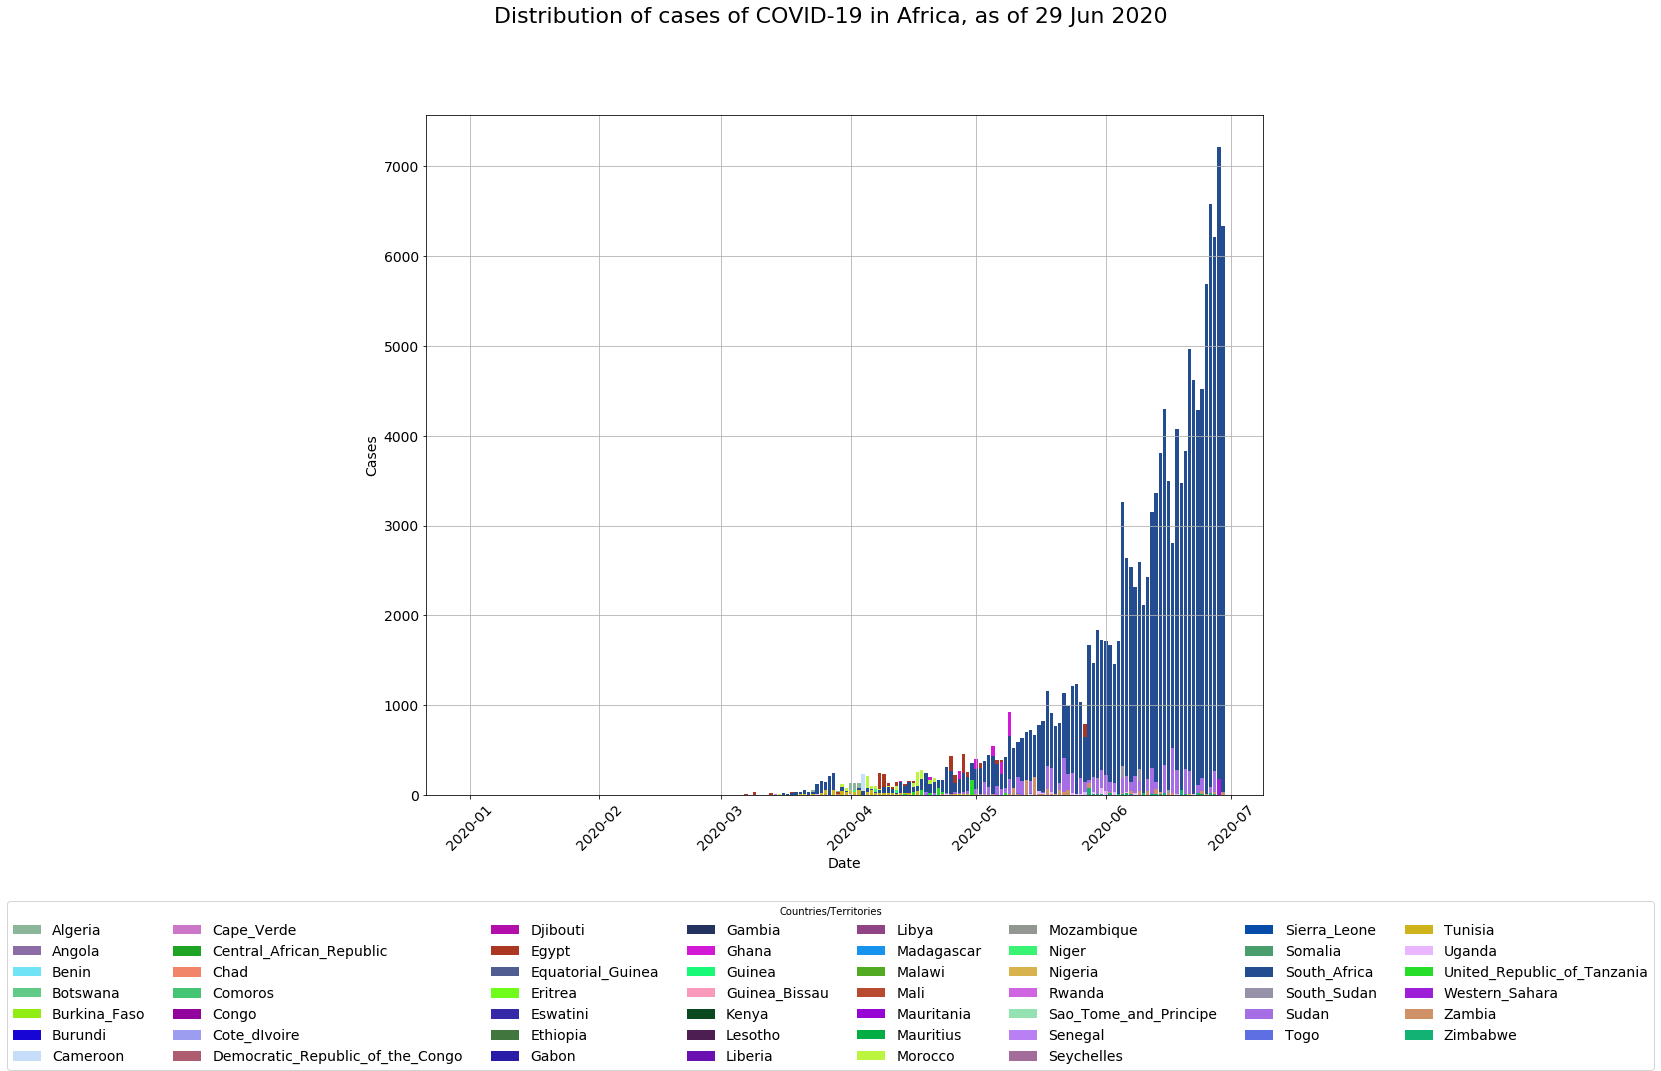

None

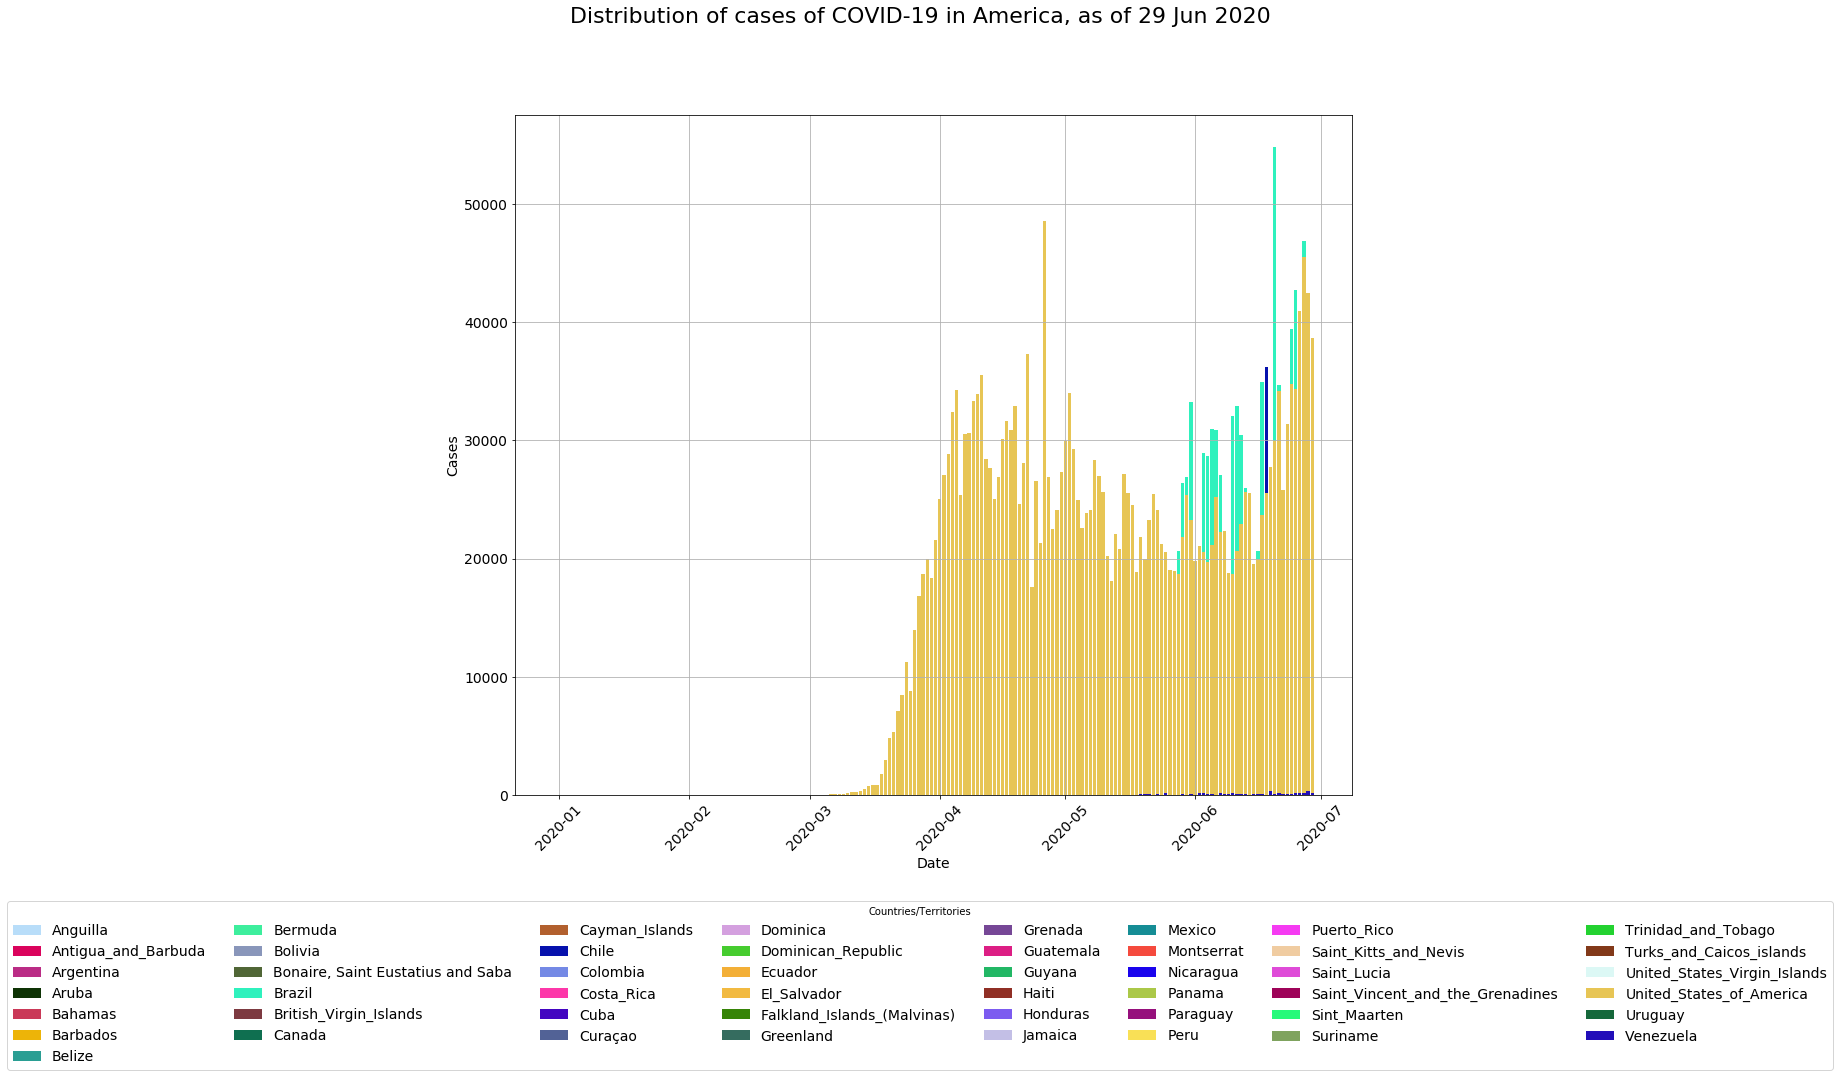

None

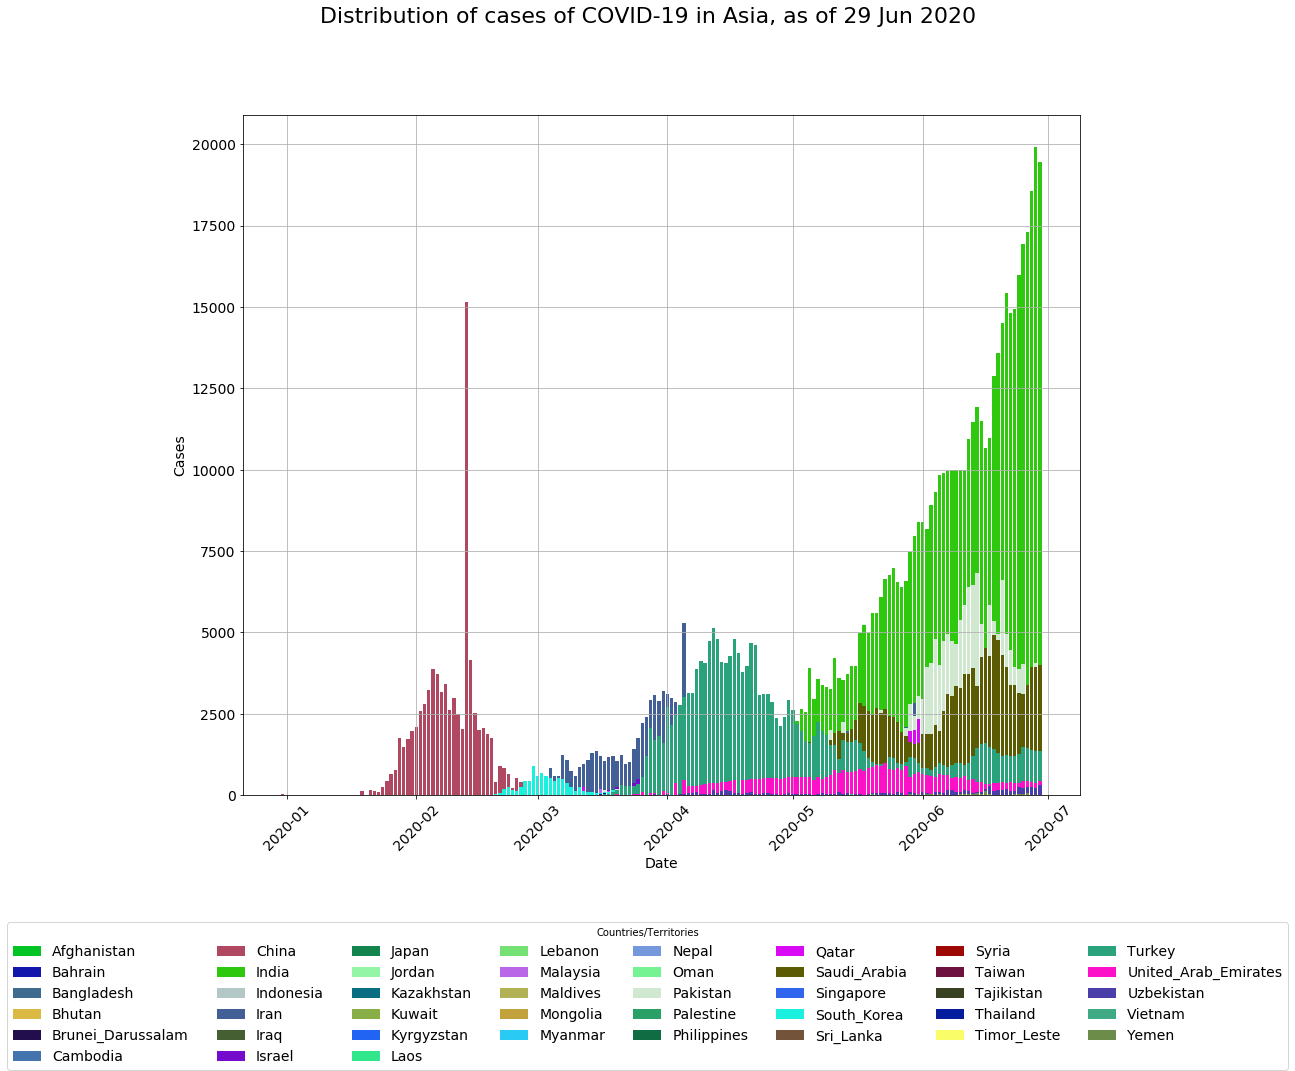

None

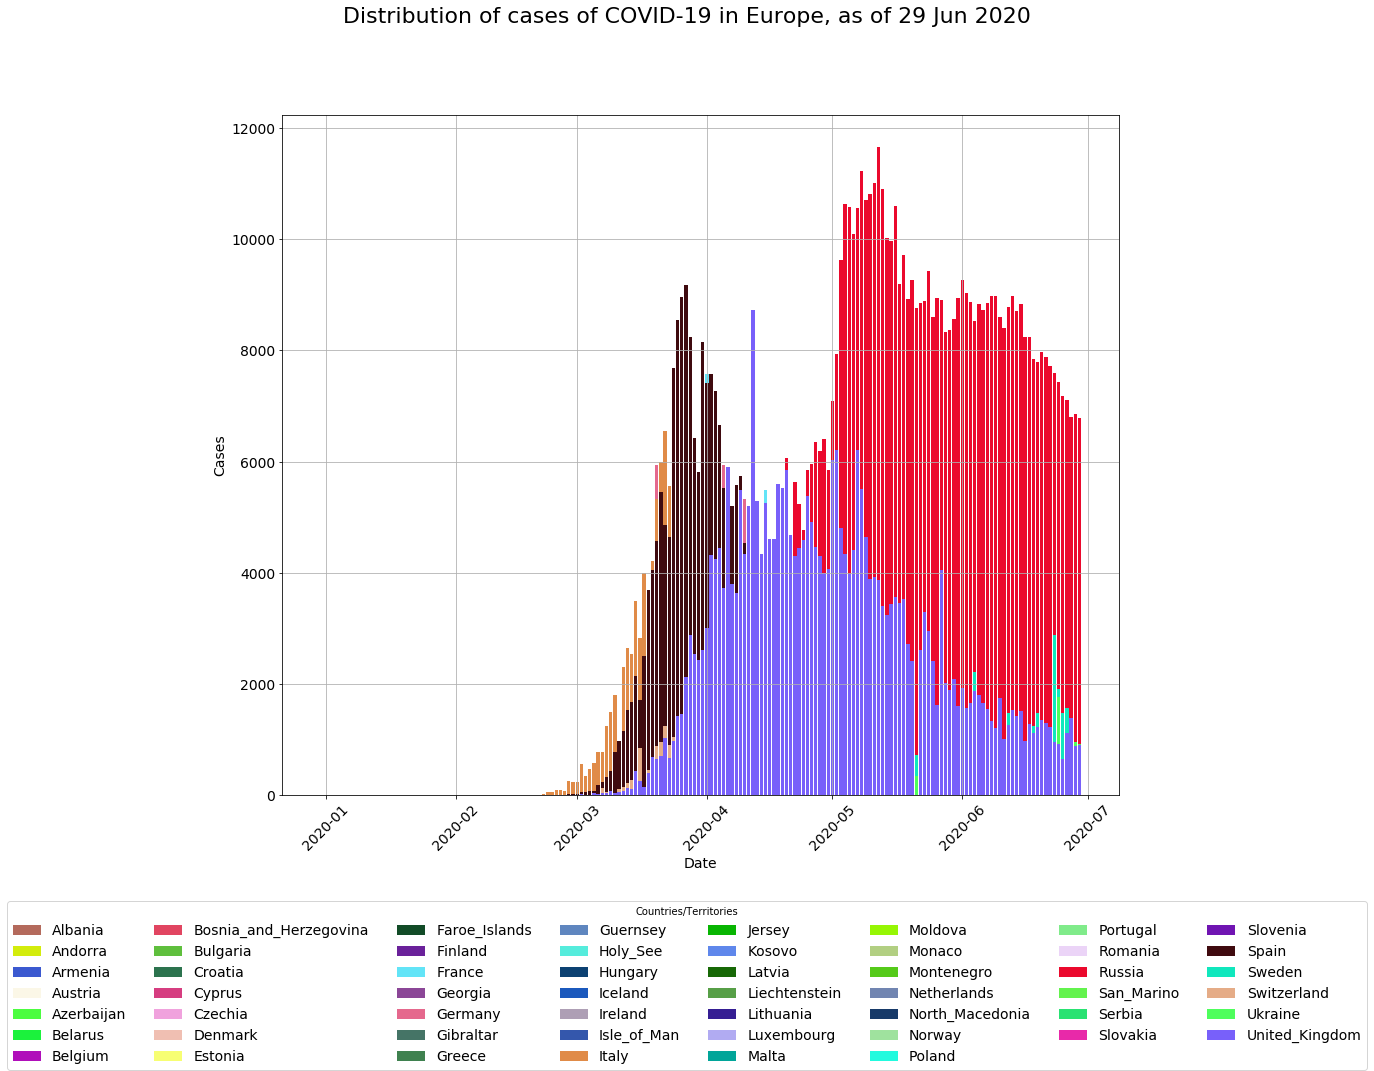

None

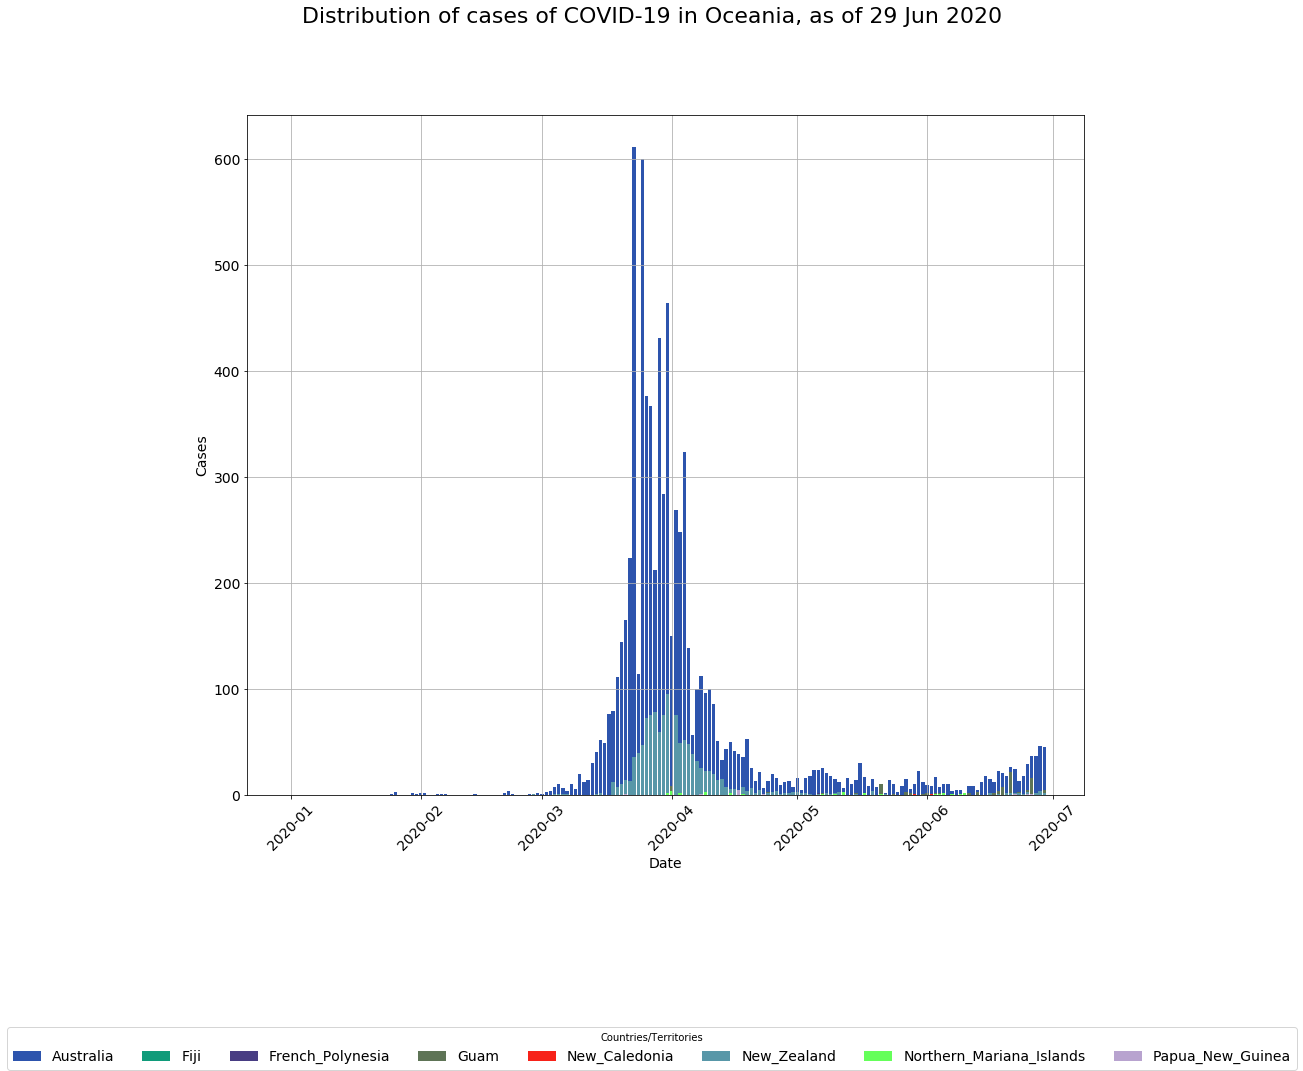

None

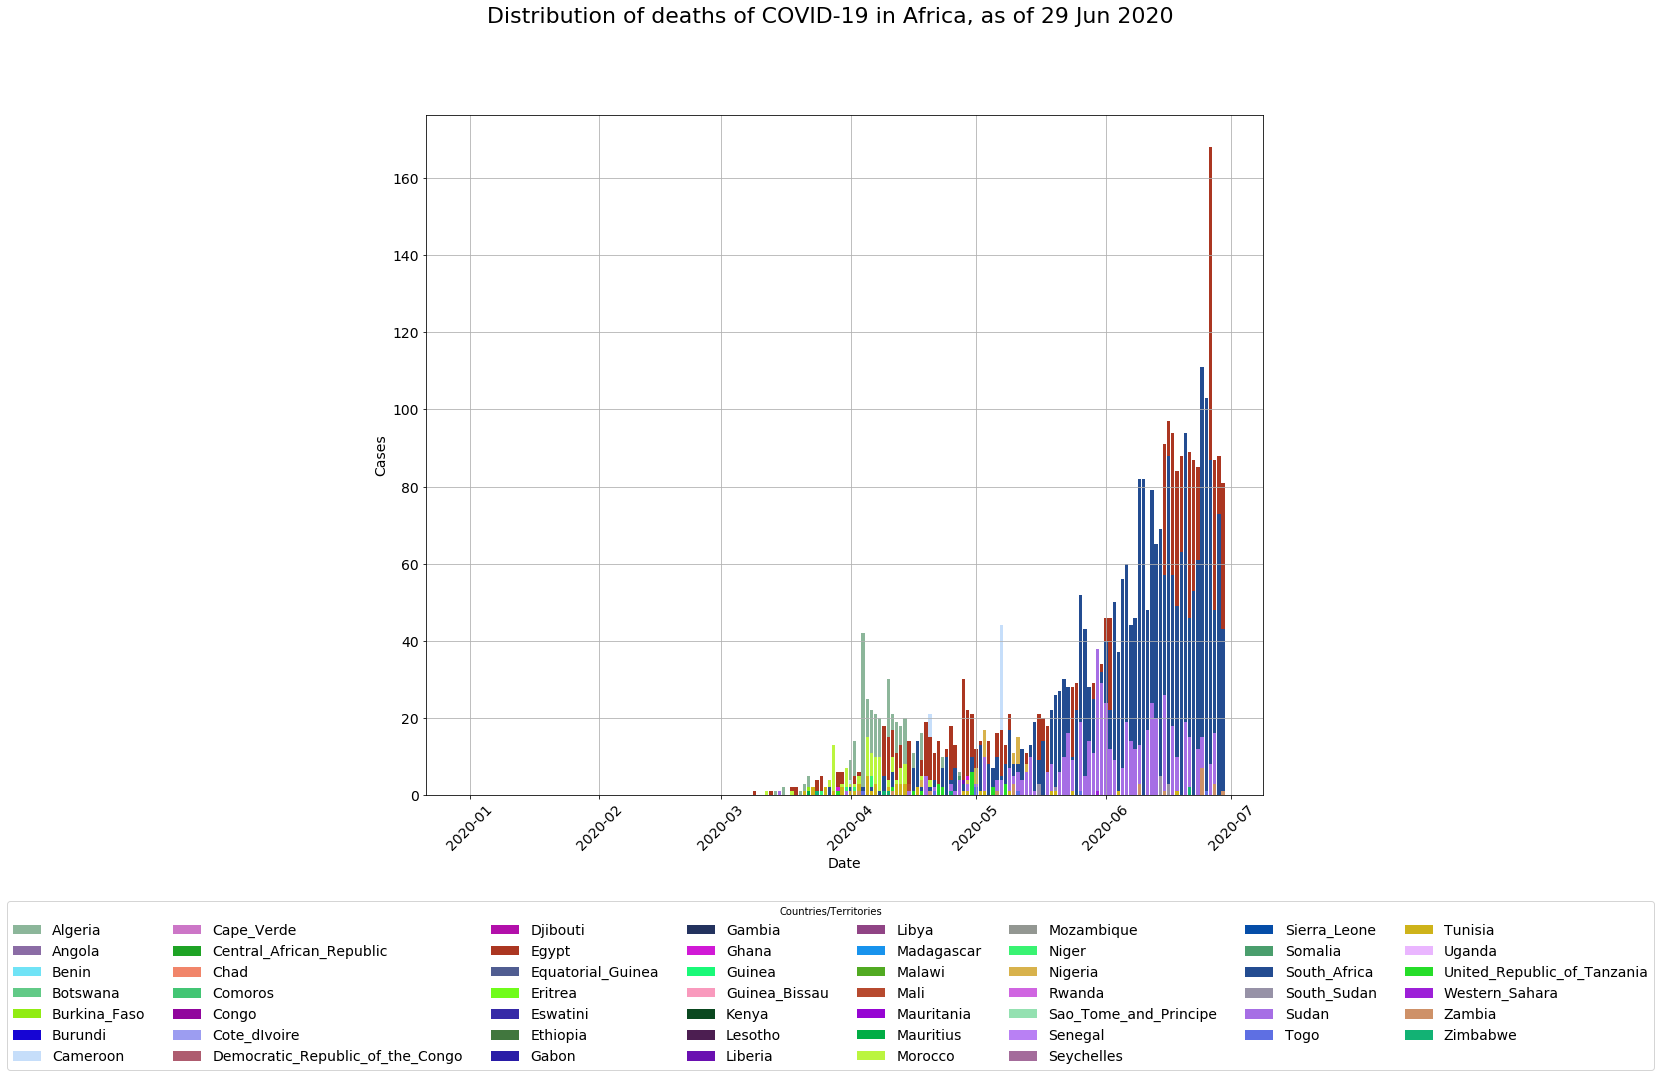

None

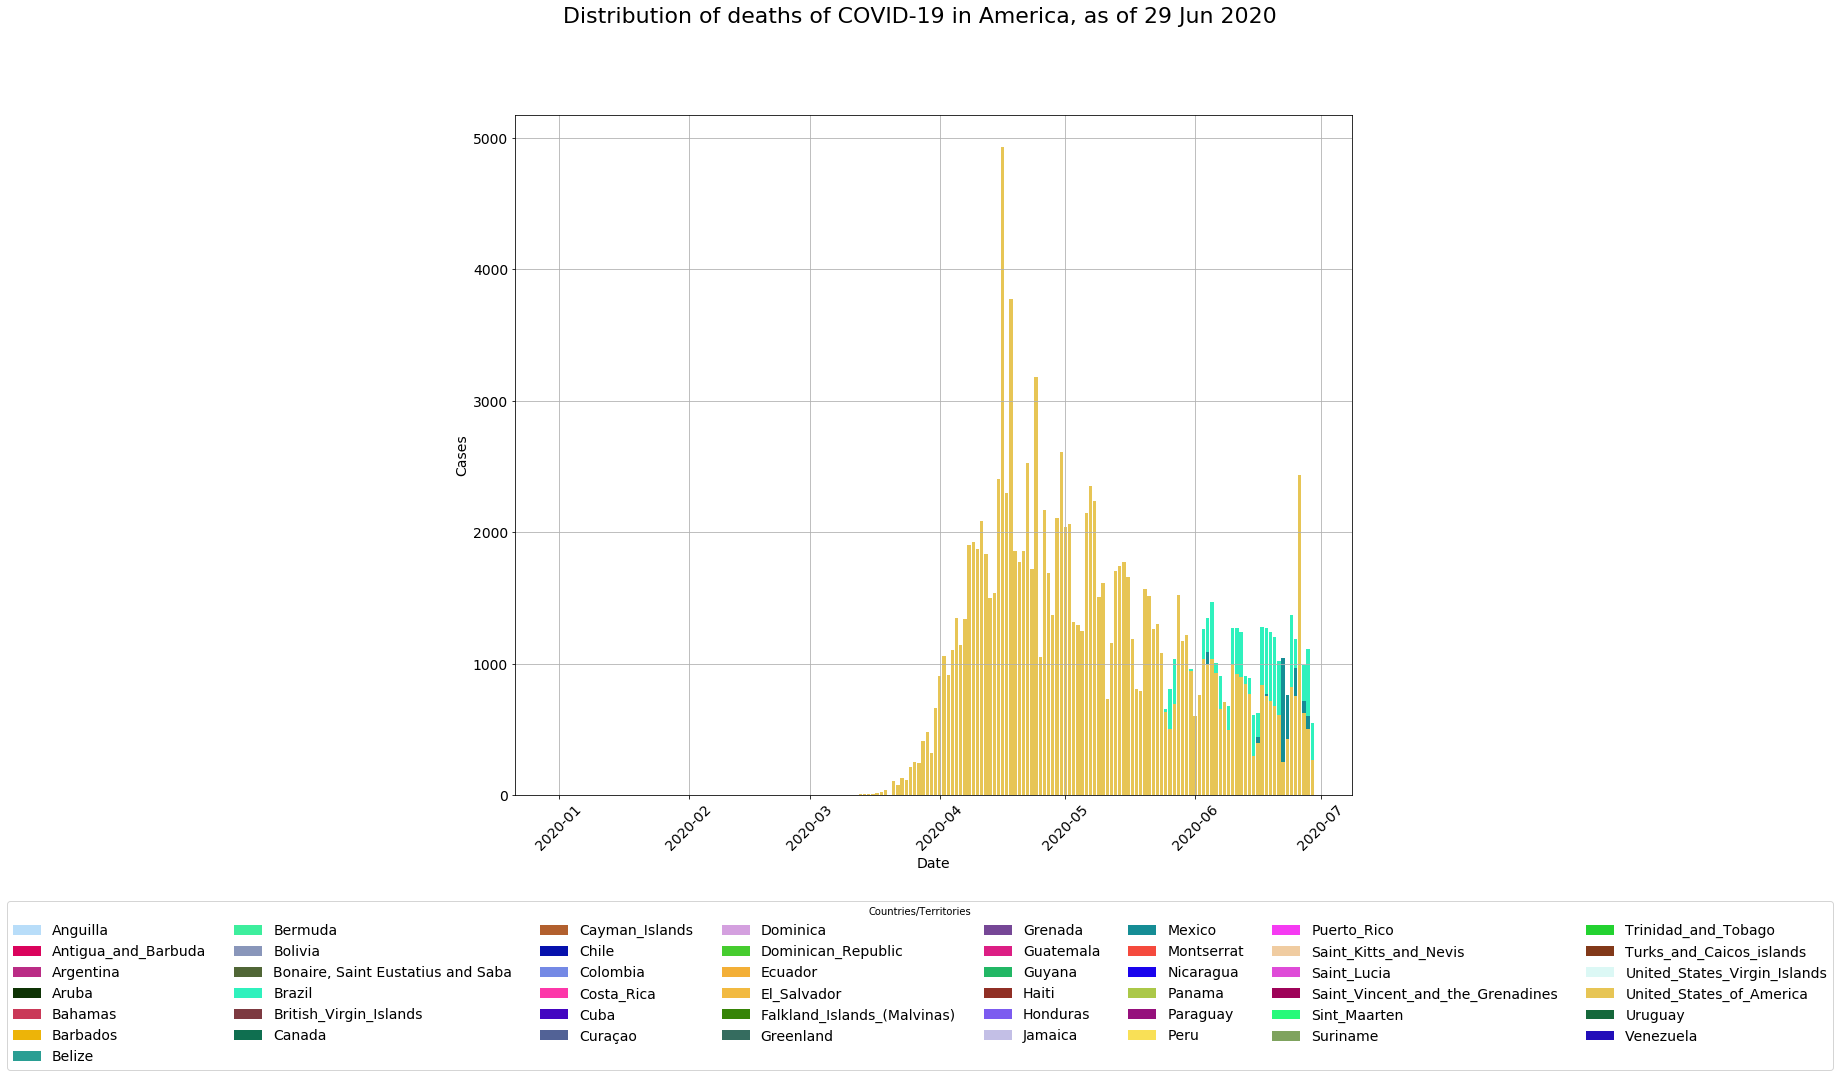

None

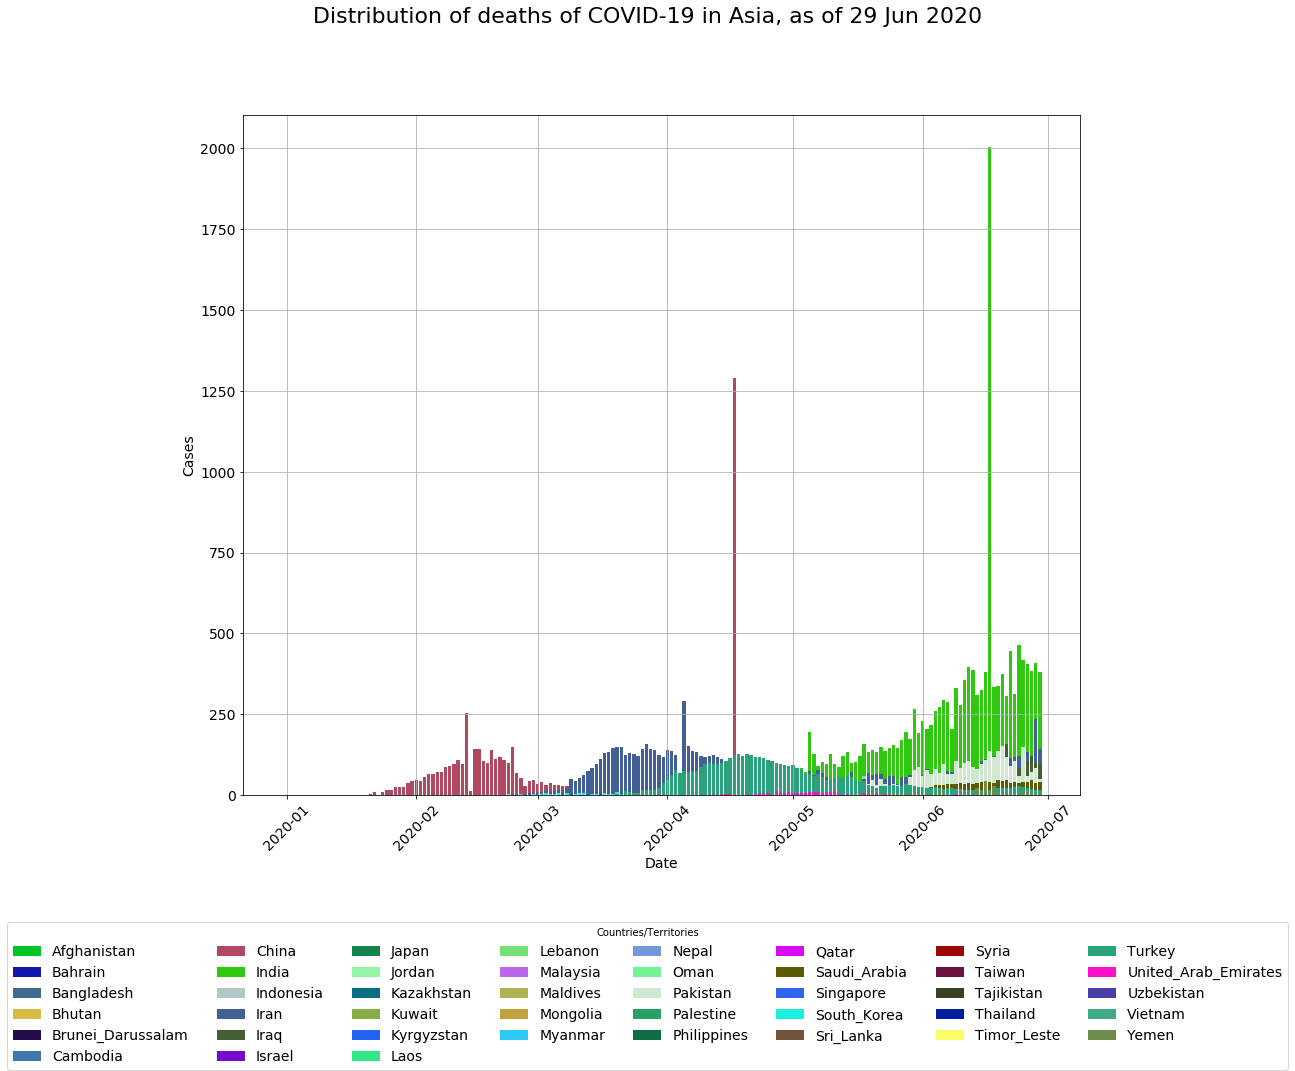

None

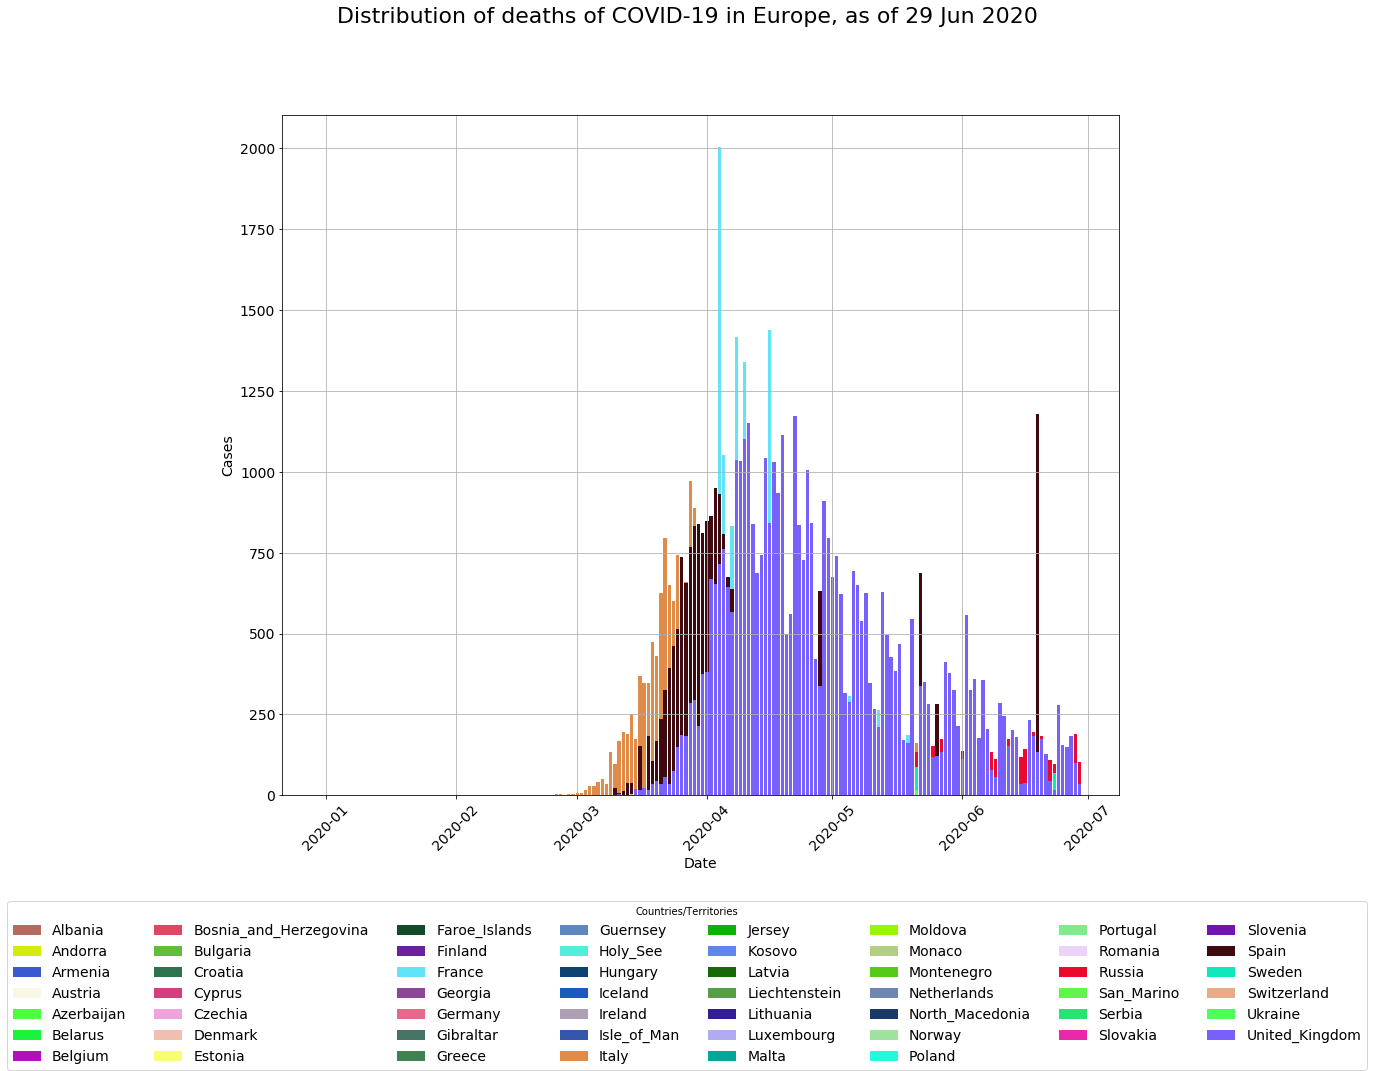

None

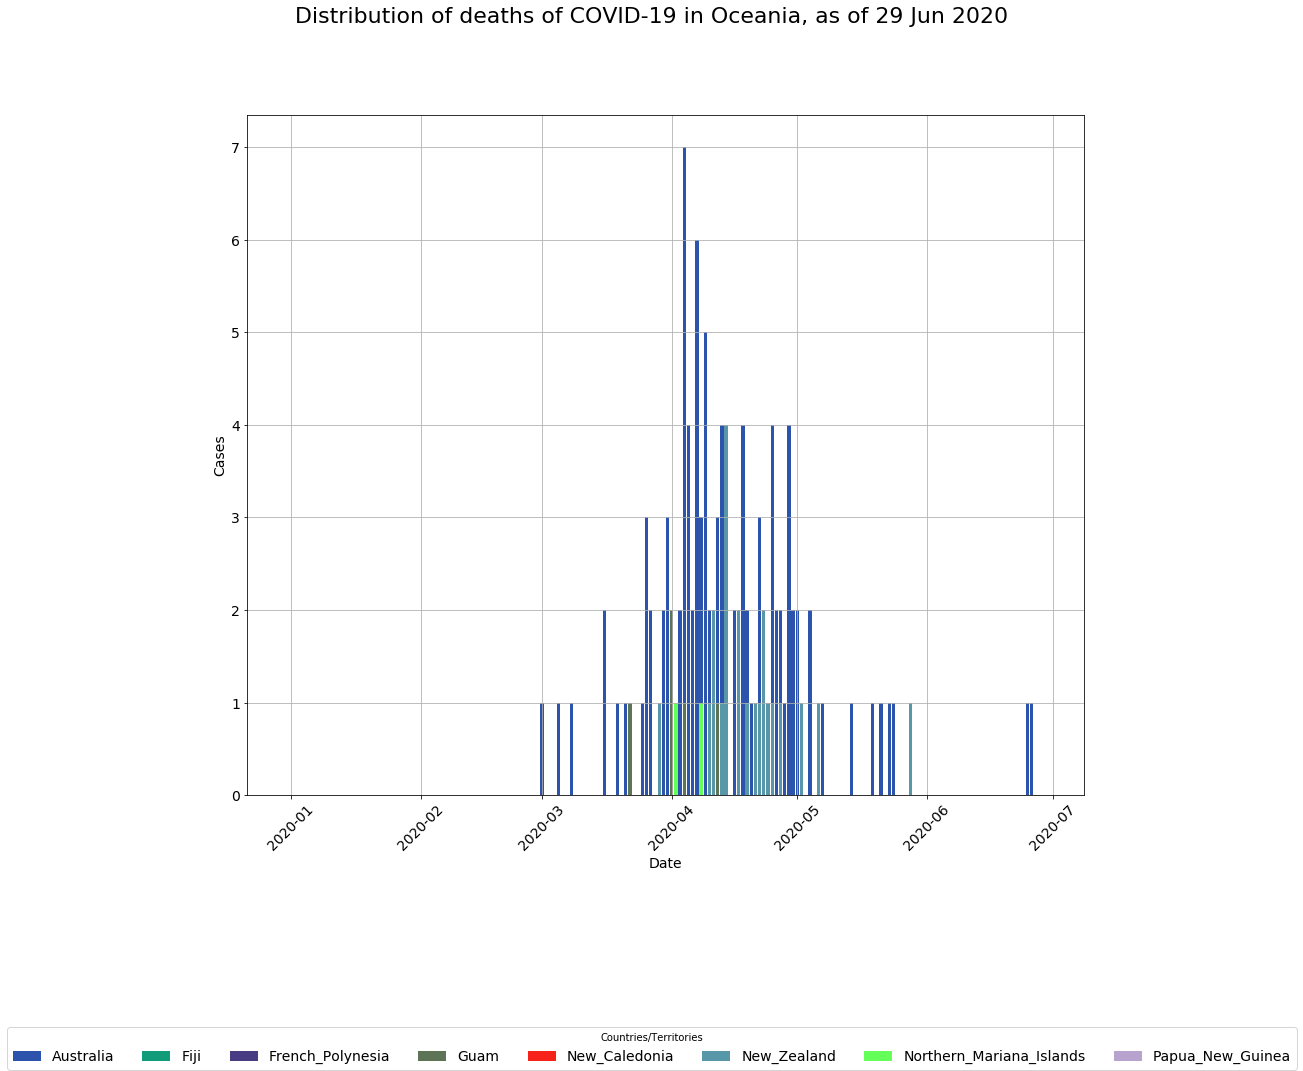

None

In [16]:
# generate distributions
distributions = data.groupby(['continentExp', 'countriesAndTerritories', 'dateRep']).\
    agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

def plot_distribution(feature):
    x = pd.DataFrame(distributions.dateRep.unique(), columns=['dateRep'])
    np.random.seed(0)

    # loop through each continent and plot cases by country
    for c in distributions.continentExp.unique():
        plt.cla()   # Clear axis
        plt.clf()   # Clear figure
        plt.close() # Close a figure window

        fig, axs = plt.subplots(1, 1, figsize=(15,15)) # make the figure with the size 20 x 20 inches
        width = 0.4

        exp2_source = distributions[distributions['continentExp'] == c]

        axes = []
        legendLabels = []

        for ct in exp2_source.countriesAndTerritories.unique():
            exp2 = exp2_source[(exp2_source['continentExp'] == c) & \
                               (exp2_source['countriesAndTerritories'] == ct)]
            values = {'continentExp': c, 'countriesAndTerritories': ct, 'cases': 0, 'deaths': 0}
            exp2_display = pd.merge(x, exp2, on='dateRep', how='left').fillna(value=values)
            axes.append(axs.bar(exp2_display['dateRep'], exp2_display[feature], color = np.random.rand(3,)))
            legendLabels.append(ct) 

        fig.suptitle('Distribution of ' + feature + ' of COVID-19 in ' + c + ', as of ' + today, fontsize=22)
        fig.legend(labels=legendLabels, 
                   loc="lower center",
                   borderaxespad=0.1,
                   title="Countries/Territories",
                   fontsize = 14,
                   ncol=8)      

        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Cases', fontsize=14)
        plt.subplots_adjust(bottom=0.25)
        plt.grid(True)
        axs.tick_params(axis='x', which='major', labelsize=14, rotation=45)
        axs.tick_params(axis='y', which='major', labelsize=14)
        display(plt.show())
        
plot_distribution('cases')
plot_distribution('deaths')

#### Conclusion

<span style="color:darkgreen">Based on the graphs, in Africa, South Africa has fared the worst out of all the countries in the continent with an exponential growth in daily new cases. The other countries are not growing or appear to not be as exposed as badly as South Africa. However, the other countries have new cases that alternate between increasing and decreasing which leads me to believe that they are reporting bad data or do not have a sufficient method to test since the trends do not follow the standard pattern with new cases growing and decreasing.</span>

<span style="color:darkgreen">As with the new case graph, deaths are increasing daily in Africa and growing across the continent exponentially, with most of those cases coming from South Africa and Egypt.</span>

<span style="color:darkgreen">In the America’s, the graph tells a different story. The virus peaked in April with the rate of new cases and deaths, but over the last week we see the United States shift from decreasing to increasing in terms of new cases, whereas Brazil has consistently been increasing. Looking across the America trend in new death counts, it has been decreasing if we ignore the last few days except in Brazil where it has continued to increase. However, over the last few days we see the United States shift from a decrease in new deaths to increasing at rates not seen since April.</span>

<span style="color:darkgreen">In Asia, we can see that the virus was widespread in China, but they have been able to stop the spread. Most of the new cases in Asia are now coming from India which has the most new cases in the continent followed by Saudi Arabia and Pakistan, although they are not increasing at the same rate as India. The same trend can be seen in the daily new deaths, but the rate of growth is not as great as the rate of growth in new cases.</span>

<span style="color:darkgreen">In Europe, the majority of cases earlier in the year was in Spain and Italy and that has shifted to Russia and the UK accounting for most new cases. The main difference in Europe is we do not see similar trends that we see in the America’s where the rate of new cases has been decreasing then started to increase again. The same trends are seen in daily new deaths.</span>

<span style="color:darkgreen">Lastly, Oceania had a large spike in daily new cases and deaths in April, but it has leveled off.</span>

### Exploration - Step 3: Distribution of cases and deaths of COVID-19 -- Top 10 cases

In [17]:
# generate distributions
cumulative_cases_deaths_add_features = get_facts()
distributions = data.groupby(['continentExp', 'countriesAndTerritories', 'dateRep']).\
    agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

top10cases = cumulative_cases_deaths_add_features.sort_values(by='Sum of Cases', ascending=False).head(10)
top10distributions = distributions[distributions['countriesAndTerritories'].\
                                   isin(top10cases.countriesAndTerritories.values)]


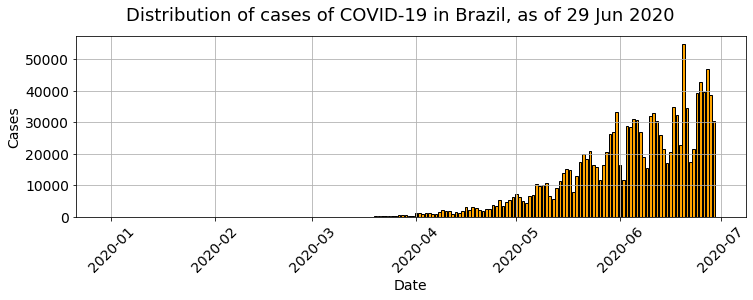

None

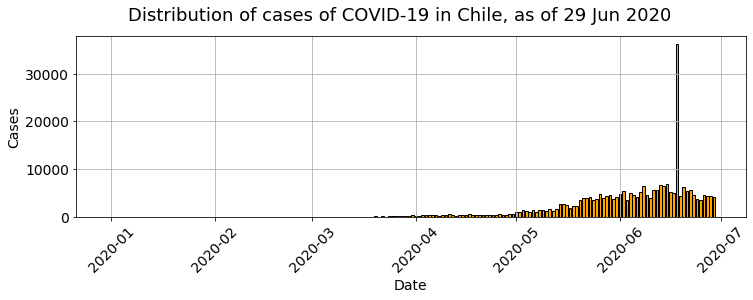

None

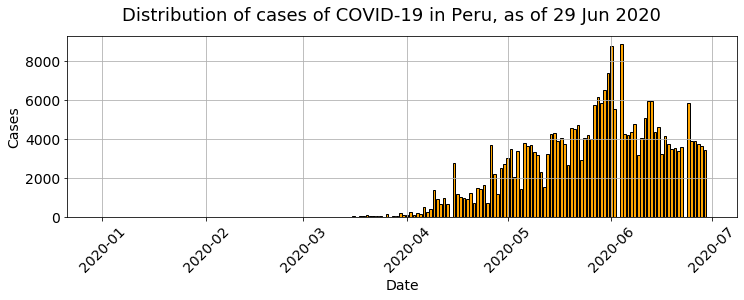

None

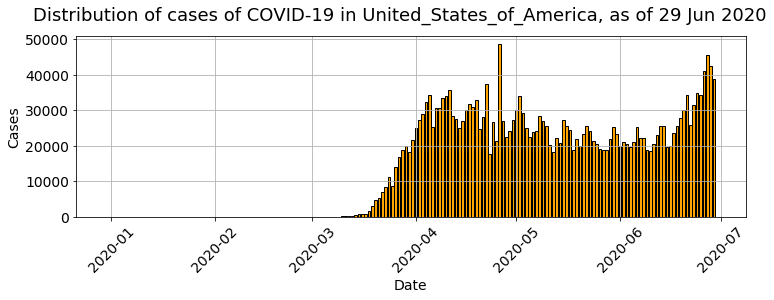

None

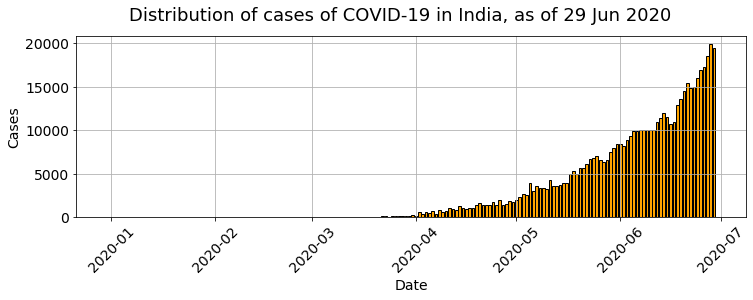

None

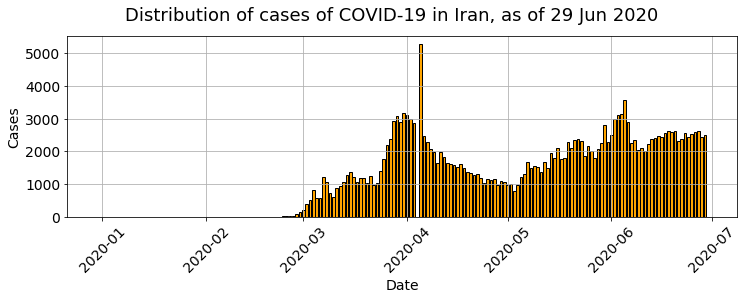

None

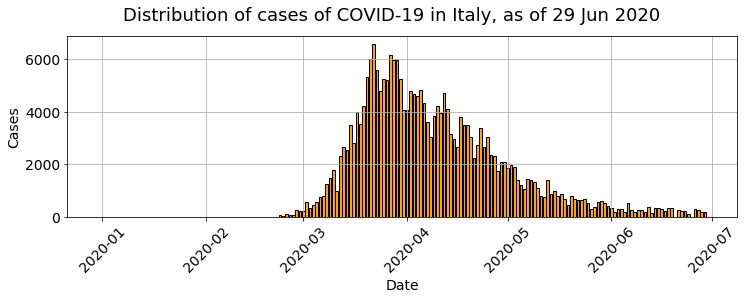

None

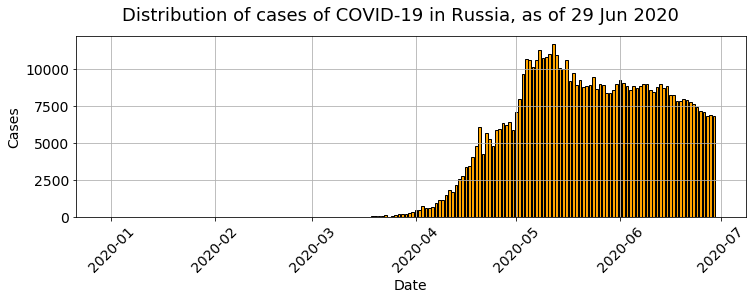

None

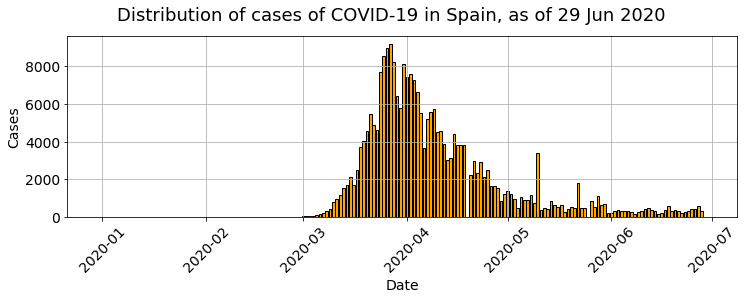

None

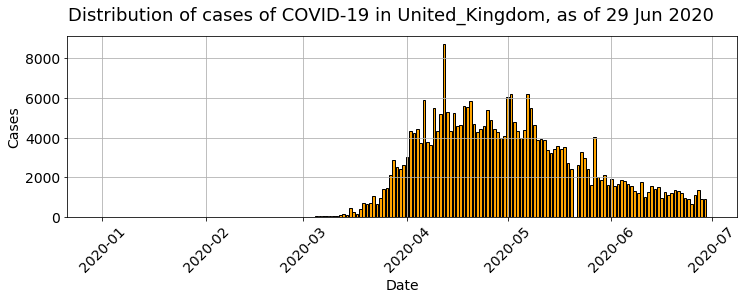

None

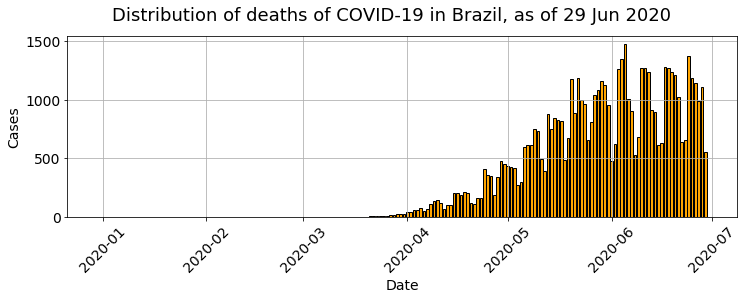

None

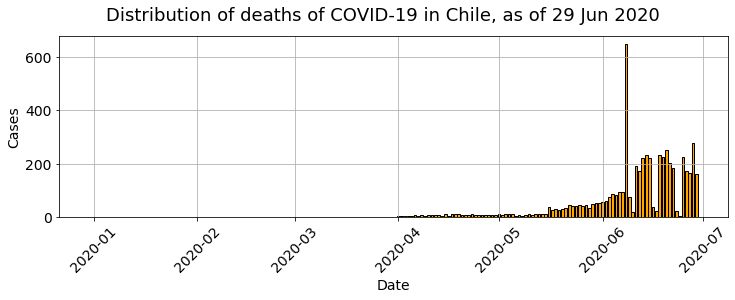

None

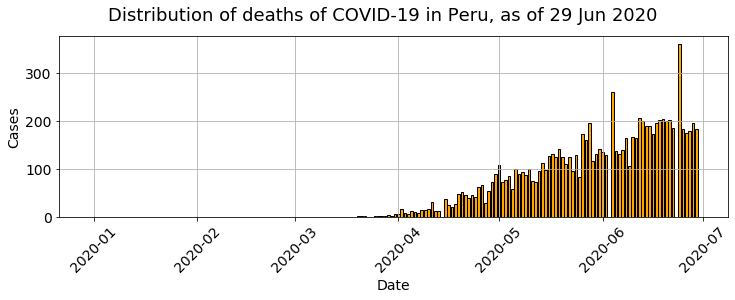

None

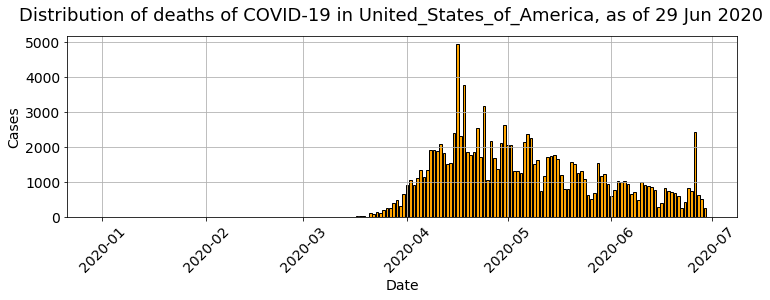

None

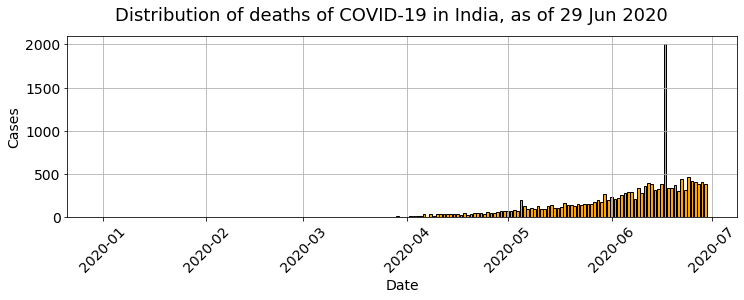

None

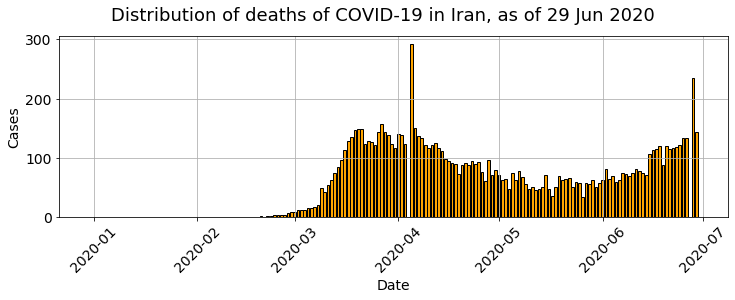

None

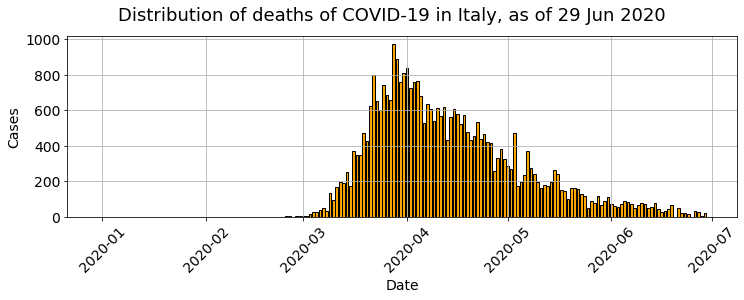

None

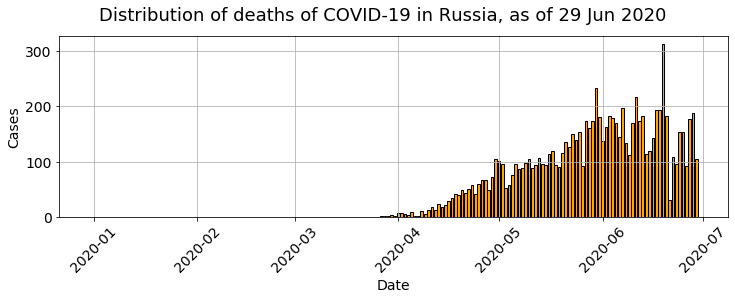

None

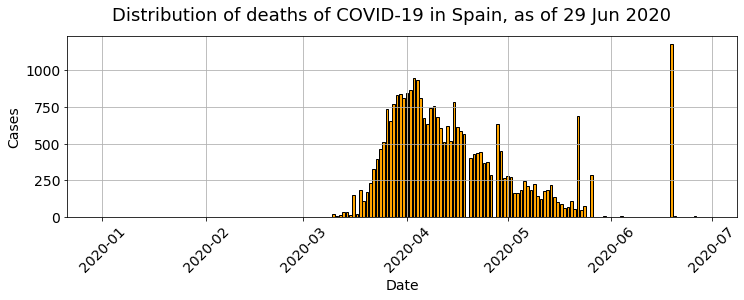

None

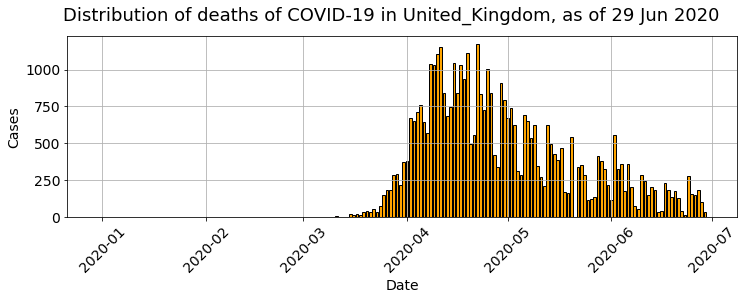

None

In [18]:
def plot_distribution(feature):
    x = pd.DataFrame(distributions.dateRep.unique(), columns=['dateRep'])
    np.random.seed(0)
    
    # loop through each continent and plot cases by country
    for ct in top10distributions.countriesAndTerritories.unique():
        exp2_source = top10distributions[top10distributions['countriesAndTerritories'] == ct]
        
        plt.cla()   # Clear axis
        plt.clf()   # Clear figure
        plt.close() # Close a figure window

        fig, axs = plt.subplots(1, 1, figsize=(12,4)) # make the figure with the size 20 x 20 inches
        width = 0.4

        axes = []

        exp2 = exp2_source[exp2_source['countriesAndTerritories'] == ct]
        values = {'countriesAndTerritories': ct, 'cases': 0, 'deaths': 0}
        exp2_display = pd.merge(x, exp2, on='dateRep', how='left').fillna(value=values)
        axes.append(axs.bar(exp2_display['dateRep'], exp2_display[feature], color = 'orange', edgecolor='k'))

        fig.suptitle('Distribution of ' + feature + ' of COVID-19 in ' + ct + ', as of ' + today, fontsize=18)   

        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Cases', fontsize=14)
        plt.subplots_adjust(bottom=0.25)
        plt.grid(True)
        axs.tick_params(axis='x', which='major', labelsize=14, rotation=45)
        axs.tick_params(axis='y', which='major', labelsize=14)
        display(plt.show())
        
plot_distribution('cases')
plot_distribution('deaths')

#### Conclusion

<span style="color:darkgreen">Based on the daily new cases graphs:</span>
<font color=darkgreen>
- Brazil is increasing and started to increase more rapidly in May and June
- Chile is increasing and started to increase more rapidly in May and June. There was a day in June where over 35,000 cases were reported which is over 3x more than any other day. This indicates that maybe Chile does not have an effective way to test or report cases
- Peru started to have growth in new cases starting in April and peaked toward the end of May / early June. Since then the cases have dropped but are not decreasing at rate that indicates the virus is contained and the new cases are relatively static in June
- United States of America had exponential growth in March to early April where they appeared to have flattened the curve in late April. However, starting in mid-June the new cases started increasing and are hitting higher levels than seen during the months of April and May
- India has seen exponential growth since April and does not appear to have the virus contained
- Iran had exponential growth from March to April and then started to have a decrease in new cases. However, since May the cases have started to increase again
- Italy had exponential growth starting in March and since then the new cases have dropped significantly. It would seem Italy has the virus contained
- Russia saw exponential growth starting in April and since early May the cases have started to decrease
- Spain had exponential growth starting in March and since then the new cases have dropped significantly. It would seem Italy has the virus contained
- United Kingdom had exponential growth in March to mid April and since then the new cases have dropped significantly. However, there still is a big number of new cases and it has not dropped to similar levels of Italy and Spain which indicates that more work is still needed to contain the virus</font>

<span style="color:darkgreen">Based on the daily new death’s graphs:</span>
<font color=darkgreen>
- Brazil had exponential growth starting in April and peaked in June where it appears to have flattened but the rate is not decreasing
- Chile had exponential growth starting in May and has peaked in June where it appears to have flattened but the rate is not decreasing. There was a large number reported early in June compared to other days which may indicate that they do not have an effective way to track deaths
- Peru had exponential growth starting in April and has peaked in June where it appears to have flattened but the rate is not decreasing
- United Sates of America had exponential growth starting in April and peaked in June where it appeared to have flattened. However, the deaths begun to increase again over the last few days which is a similar trend seen in new cases
- India deaths have increased starting in late April and have yet to show a sign of decreasing which is a similar trend seen in the new cases. There was a large number of deaths reported in mid-June which may indicate they do not have an effective way to track deaths
- Iran had exponential growth in March and starting in April the trend started to decrease. However, in June the deaths started to increase again which indicates they do not have the virus contained
- Italy had exponential growth starting in March and since April the number of deaths has decreased which indicates they have the virus contained
- Russia saw exponential growth starting in April and the trend appears to have flattened but has not shown signs of decreasing
- Spain had exponential growth starting in March and since April the number of deaths has decreased which indicates they have the virus contained. However, there are two days in May and one day in June where a large number of deaths were reported which indicates that they may not be tracking deaths the same way they were in prior months
- United Kingdom had exponential growth starting in March and since late April the number of deaths has decreased. However, the rate has not decreased enough to indicate they have the virus contained similar to Italy</font>

### Exploration - Step 4: What is the fatality ratio across the countries/territories?

In [19]:
cumulative_cases_deaths_add_features = get_facts('countryterritoryCode', 1, 1)

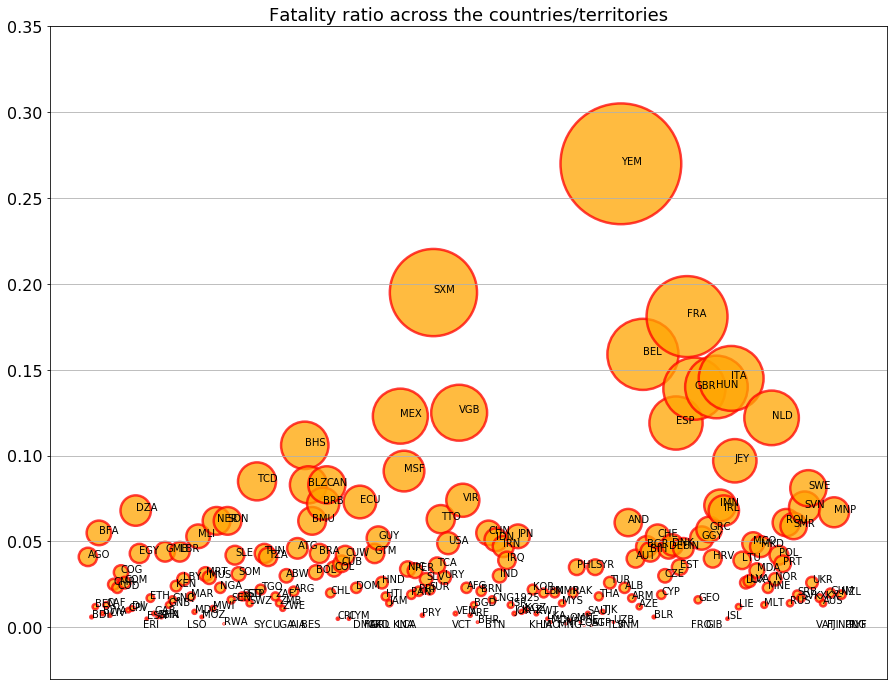

In [20]:
#cumulative_cases_deaths_add_features

plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

fr, x = [], []

for i,s in enumerate(cumulative_cases_deaths_add_features['countryterritoryCode']):
    cc = cumulative_cases_deaths_add_features['countryterritoryCode'].iloc[i]
    r = np.round(cumulative_cases_deaths_add_features['Fatality Rate'].iloc[i],3)
    x.append(cc)
    fr.append(r)

fr = np.array(fr)
plt.figure(figsize=(15,12))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.title("Fatality ratio across the countries/territories",fontsize=18)
plt.scatter(x=x,
            y=fr,
            s=2e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)

for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))

plt.ylim(-0.03,0.35)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

#### Conclusion

<span style="color:darkgreen">The bubble chart on fatality rates is similar to the findings seen in the first exploration where countries in Europe have the highest fatality rate. The largest is Yemen at 26.9 following by Sint Maarten at 19.48, however Sint Marten only has 77 reported cases and Yemen only has 1,089. The countries with the highest fatality rates are France, Belgium, United Kingdom, Italy, Spain, Netherlands, and Mexico. All of those countries have a large number of COVID-19 cases.</span>

### Exploration - Step 5: Is the death count incresing with the rate of cases?

Countries investigated:
- United_Kingdom
- Spain
- Italy
- Germany
- France
- Russia
- India
- Iran
- Turkey
- Pakistan
- China
- United_States_of_America
- Brazil
- Peru
- Chile
- Mexico
- Canada
- South_Africa
- Egypt

In [21]:
# generate distributions
distributions = data.groupby(['continentExp', 'countriesAndTerritories', 'dateRep']).\
    agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

In [22]:
# Function to create scatter plot of two variables for a given country/territory
def plot_xy(varx='cases',
            vary='deaths',
            attr='United_States_of_America'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
    
    plt.cla()   # Clear axis
    plt.clf()   # Clear figure
    plt.close() # Close a figure window
 
    y = distributions[distributions['countriesAndTerritories']==attr][vary]
    x = distributions[distributions['countriesAndTerritories']==attr][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,attr),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.tick_params(axis='x', which='major', labelsize=14, rotation=45)
        plt.tick_params(axis='y', which='major', labelsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

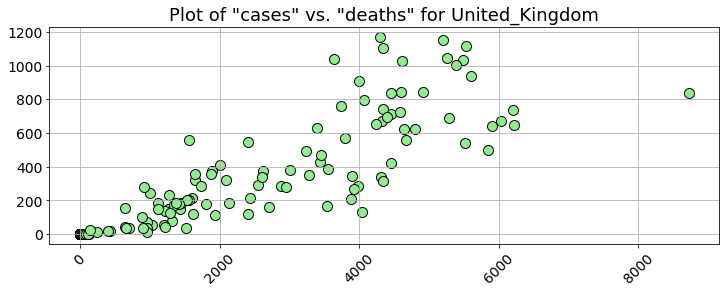

None

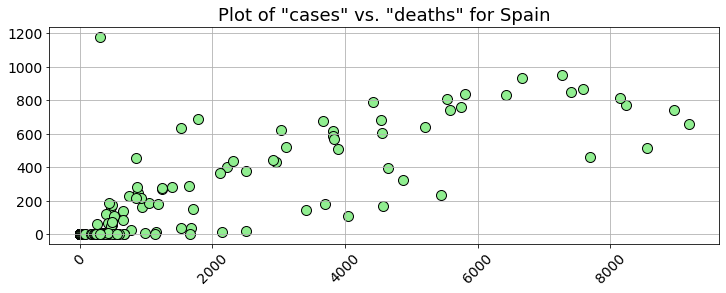

None

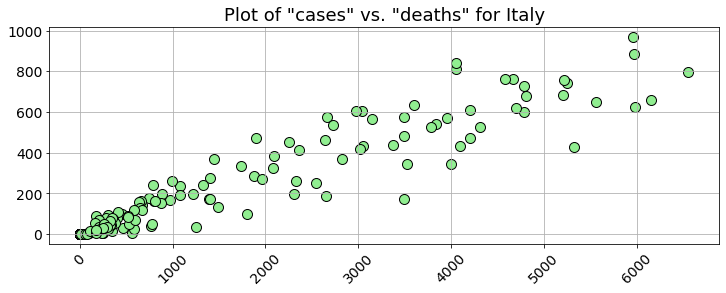

None

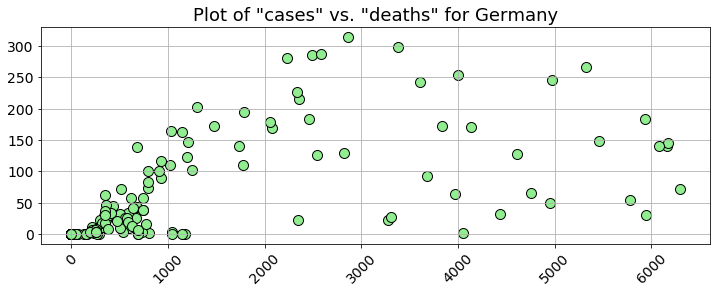

None

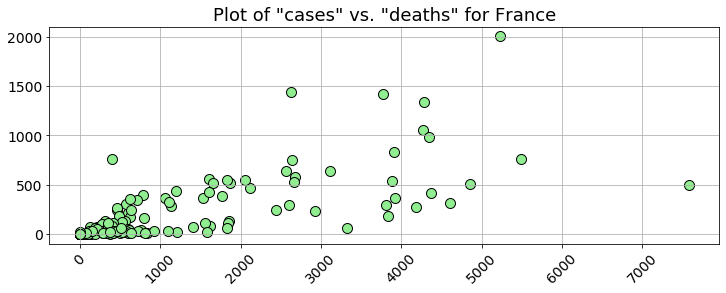

None

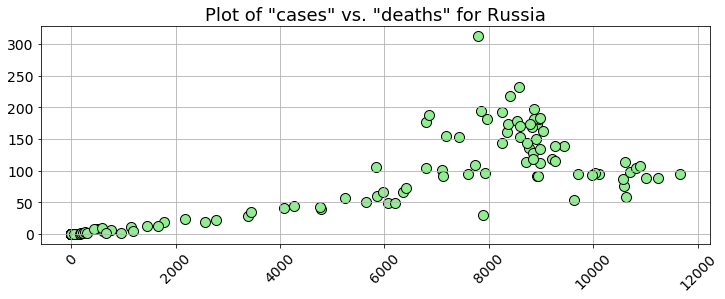

None

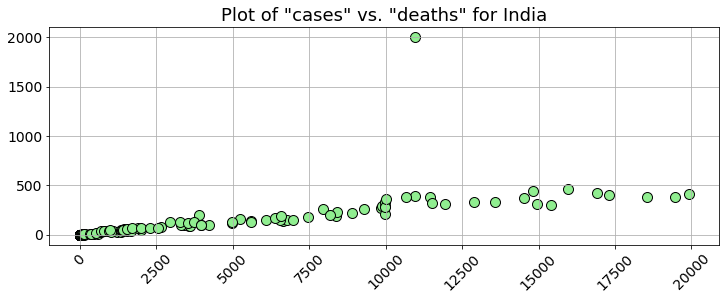

None

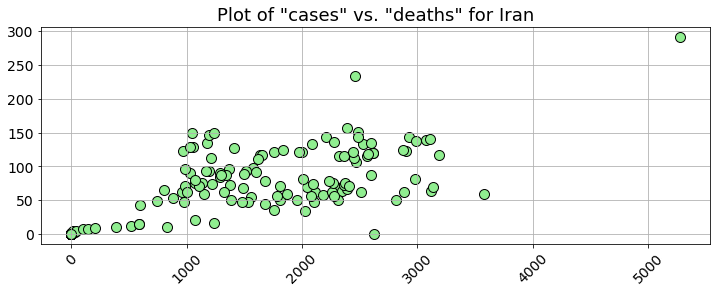

None

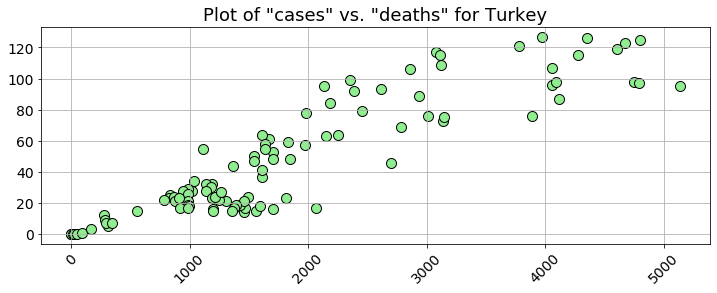

None

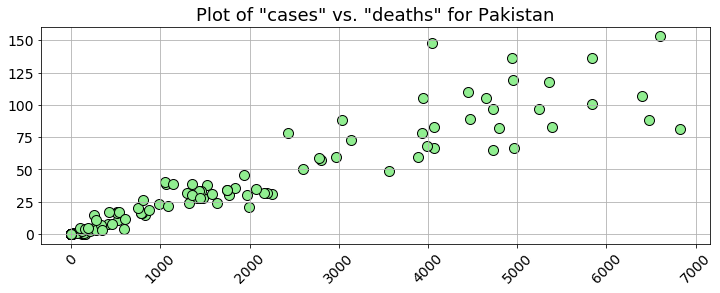

None

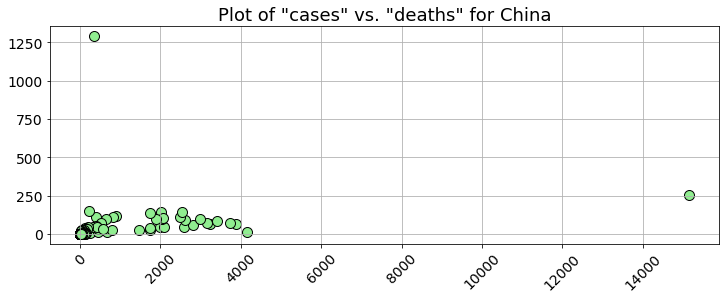

None

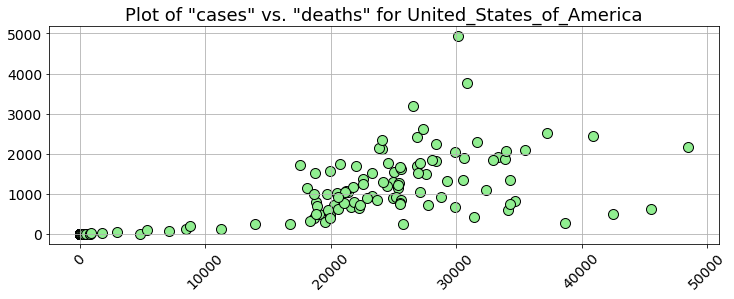

None

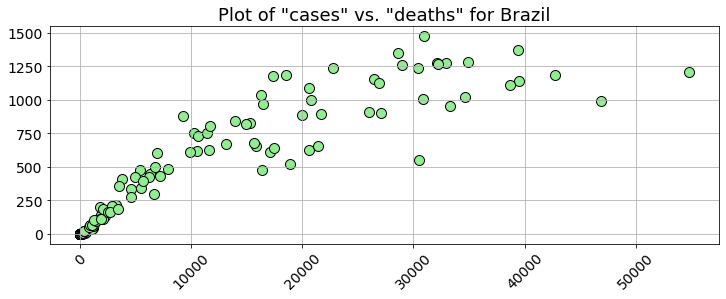

None

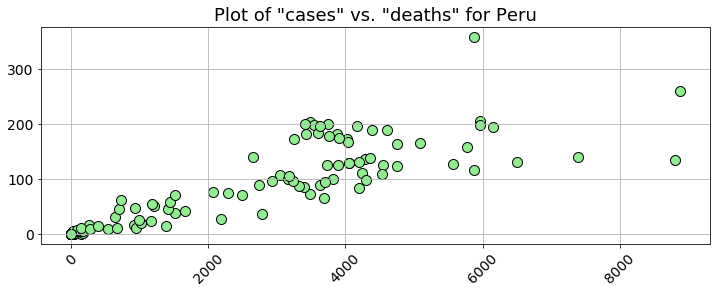

None

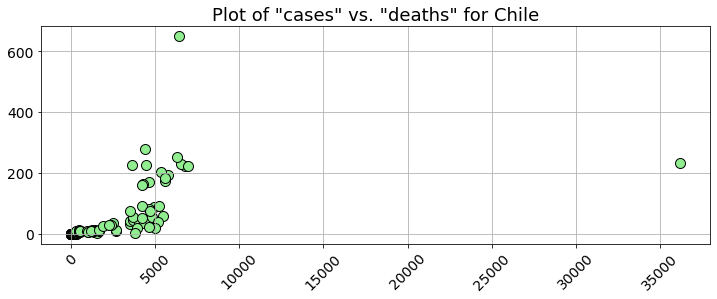

None

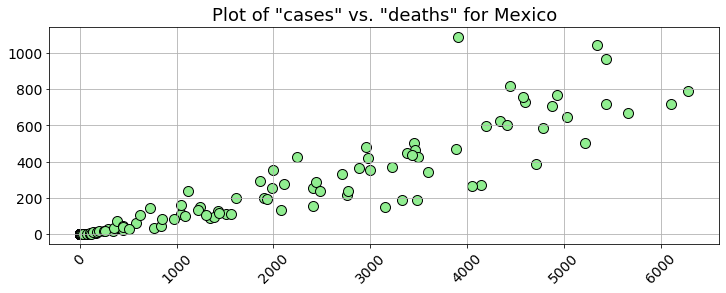

None

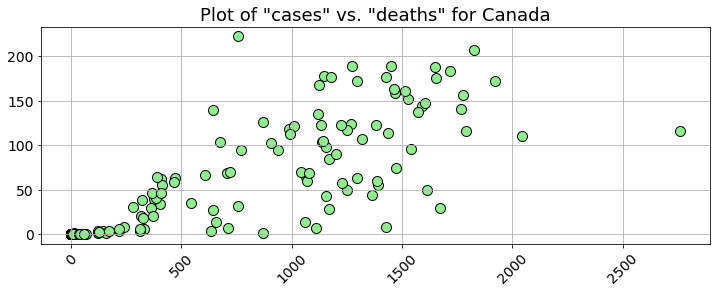

None

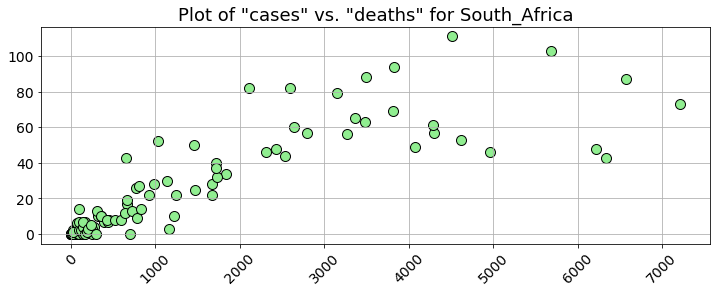

None

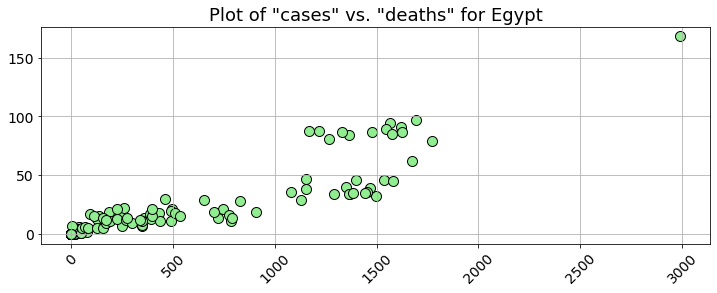

None

In [23]:
c_list = ['United_Kingdom', 'Spain', 'Italy', 'Germany', 'France', 'Russia', 'India', 'Iran', 'Turkey', 
    'Pakistan', 'China', 'United_States_of_America', 'Brazil', 'Peru', 'Chile', 'Mexico', 'Canada', 
    'South_Africa','Egypt']

for c in c_list:
    display(plot_xy(attr=c))

#### Conclusion

<span style="color:darkgreen">The scatter charts of cases vs. deaths show a positive correlation in the United Kingdom, Spain, Italy, France, Russia, India, Iran, Turkey, Pakistan, United States of America, Brazil, Peru, Chile, Mexico, South Africa, and Egypt.</span>

<span style="color:darkgreen">There is no correlation in Germany and Canada and the correlation looks to be flat in China.</span>

<span style="color:darkgreen">Since the majority of the countries show a positive correlation it appears that we can assume that the higher number of cases also indicates that the deaths follow. It would also appear that the method of tracking cases and deaths in Germany, Canada, and China do not follow similar trends and these countries may have issues tracking the virus.</span>

### Data scaling and comparisons (10 points)
#### 'Fatality Rate Variable' Transformation using Scikit Learn

In [24]:
variable = get_facts()

In [25]:
def create_plot(x_attr, y_attr, plot_type):
    x = variable[x_attr]
    y = np.array(variable[y_attr]).reshape(-1,1)
    
    if(plot_type == 'Unscaled'):
        y = variable[y_attr]
    elif(plot_type == 'StandardScaler'):
        y = StandardScaler().fit_transform(y)
    elif(plot_type == 'MinMaxScaler'):
        y = MinMaxScaler().fit_transform(y)
    elif(plot_type == 'MaxAbsScaler'):
        y = MaxAbsScaler().fit_transform(y)
    elif(plot_type == 'RobustScaler'):
        y = RobustScaler(quantile_range=(25, 75)).fit_transform(y)
    elif(plot_type == 'PowerTransformer-yeo-johnson'):
        y = PowerTransformer(method='yeo-johnson').fit_transform(y)
    elif(plot_type == 'sample-wise L2 normalizing'):
        y = Normalizer().fit_transform(y)
        
    
    plt.cla()   # Clear axis
    plt.clf()   # Clear figure
    plt.close() # Close a figure window

    plt.figure(figsize=(12,4))
    plt.title('{} {}'.format(y_attr, plot_type),fontsize=18)
    plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
    plt.grid(True)
    plt.tick_params(axis='x', which='major', labelsize=14, rotation=45)
    plt.tick_params(axis='y', which='major', labelsize=14)
    plt.show()
    

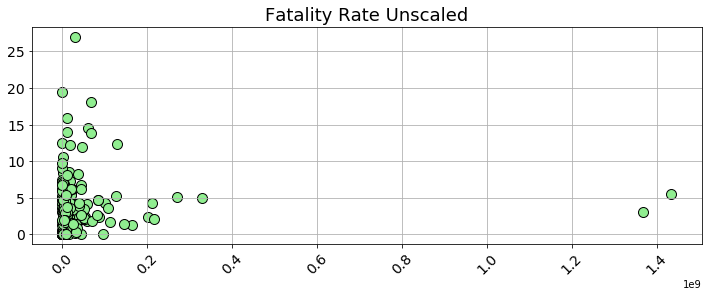

None

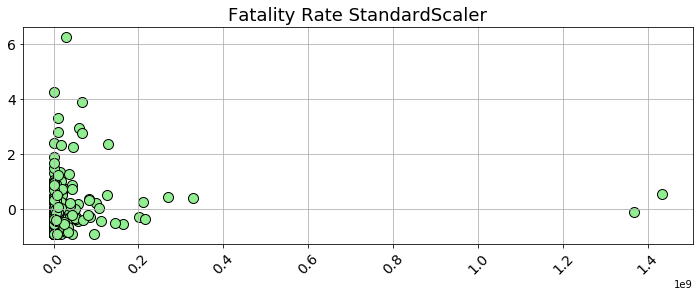

None

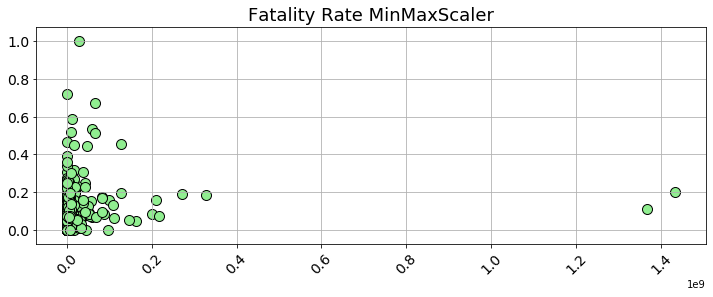

None

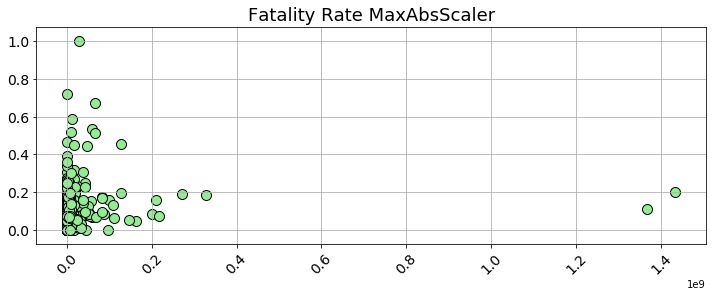

None

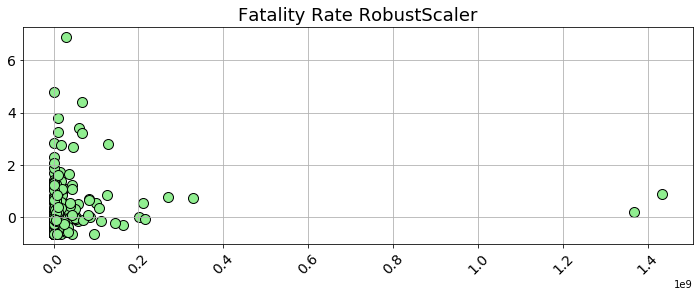

None

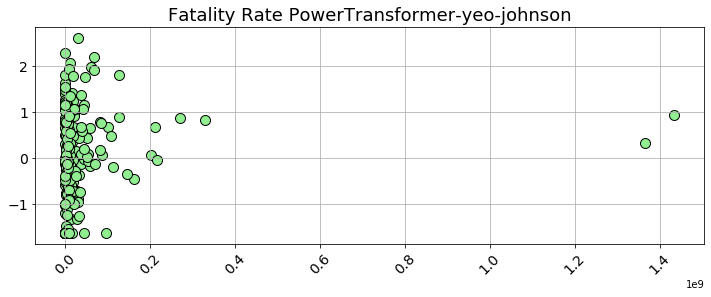

None

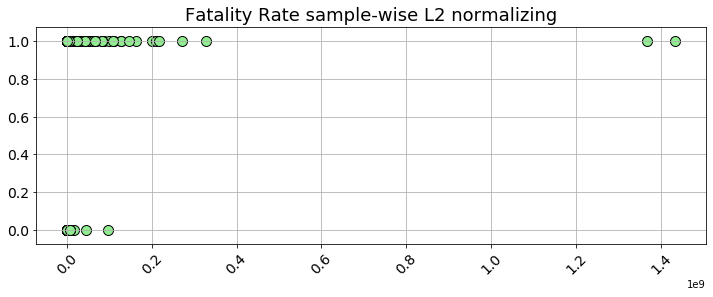

None

In [26]:
display(create_plot('Population', 'Fatality Rate', 'Unscaled'))
display(create_plot('Population', 'Fatality Rate', 'StandardScaler'))
display(create_plot('Population', 'Fatality Rate', 'MinMaxScaler'))
display(create_plot('Population', 'Fatality Rate', 'MaxAbsScaler'))
display(create_plot('Population', 'Fatality Rate', 'RobustScaler'))
display(create_plot('Population', 'Fatality Rate', 'PowerTransformer-yeo-johnson'))
display(create_plot('Population', 'Fatality Rate', 'sample-wise L2 normalizing'))

#### Conclusion

<span style="color:darkgreen">A review of the effect of transformation was done using the fatality rate variable. Using the sklearn and mathplotlib libraries, we are able to see the effect on the distribution of data when we use scaling techniques against the fatality rate variable. The distribution seemed un-effected when using the StandardScaler and MinMaxScaler so I expanded the transformations to include MaxAbsScaler, RobustScaler, PowerTransformer-yeo-johnson, and sample-wise L2 normalizing.</span>

<span style="color:darkgreen">MaxAbsScaler and RobustScaler seemed to be un-effected with the transformation, whereas PowerTransformed and sample-wise L2 had an impact. According to Cacho (2019) the PowerTransformer method is good when the data is not normally distributed and when there is a lot of variance at either the lower or higher end of the distribution. L2 normalization can be useful when you want to force learned embeddings to lie on a sphere or something similar. However, PowerTransformer was better fit as it only normalized the data on the higher end of the variable. Whereas, the L2 normalization completely changed the shape so I would suspect that is a bad method. I’m not convinced PowerTransformer is needed for this either.</span>

References:

Cacho, J. (2019, May 13). How to use PowerTransformer to improve model performance. Medium. https://medium.com/@josecacho/how-to-use-powertransformer-to-improve-model-performance-e62357fb4df8

### Insights from analysis (10 points)

<span style="color:darkgreen">Insights can be found after each exploration above in <b>green text</b>.</span>

<span style="color:darkgreen">Overall Analysis:</span>

<span style="color:darkgreen">Clearly the COVID-19 pandemic has had a global impact with 9,776,675 cases, 494,777 deaths, and a fatality rate of 5.06%. Based on the data we can expect that 127.52 people will be infected and 6.45 will die per 100,000 across the globe. The most cases have been in the United States of America, Brazil, Russia, India, United Kingdom, Peru, Chile, Span, Italy, and Iran. Not only are countries impacted but we can see a massive increase in new cases across continents such as Africa, America, and Asia. However, there are signs of hope. In Oceania the number of cases has dropped significantly, and we are starting to see in Europe a trend of new cases decreasing. In addition, there are countries like Italy who were hit hard in March and April and appear to have the virus under control.</span>

<span style="color:darkgreen">There is a sense of caution though in this analysis as I discussed in the first exploration conclusion. Some countries did not test as much as other countries, only started reporting cases at a much later date, and the criteria of who gets tested versus not is not accounted for in this analysis. It also appears that some countries, even with large populations are not following the standard pattern, trends, and correlations of most countries. This leads me to believe that additional data attributes are needed to do a proper analysis.</span>